In [1]:
author = 'Oskar Martin'
title = 'playing around with the kaggle pga tour dataset'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/home/oscar/newsletter/golf/data/ASA All PGA Raw Data - Tourn Level.csv')

In [3]:
data.columns

Index(['Player_initial_last', 'tournament id', 'player id', 'hole_par',
       'strokes', 'hole_DKP', 'hole_FDP', 'hole_SDP', 'streak_DKP',
       'streak_FDP', 'streak_SDP', 'n_rounds', 'made_cut', 'pos', 'finish_DKP',
       'finish_FDP', 'finish_SDP', 'total_DKP', 'total_FDP', 'total_SDP',
       'player', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'tournament name',
       'course', 'date', 'purse', 'season', 'no_cut', 'Finish', 'sg_putt',
       'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total'],
      dtype='object')

In [4]:
data_rel = data.drop(columns=['hole_DKP', 'hole_FDP', 'hole_SDP', 'streak_DKP',
       'streak_FDP', 'streak_SDP', 'n_rounds', 'made_cut', 'pos', 'finish_DKP',
       'finish_FDP', 'finish_SDP', 'total_DKP', 'total_FDP', 'total_SDP', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'purse'])

In [5]:
data_rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  36864 non-null  object 
 1   tournament id        36864 non-null  int64  
 2   player id            36864 non-null  int64  
 3   hole_par             36864 non-null  int64  
 4   strokes              36864 non-null  int64  
 5   player               36864 non-null  object 
 6   tournament name      36864 non-null  object 
 7   course               36864 non-null  object 
 8   date                 36864 non-null  object 
 9   season               36864 non-null  int64  
 10  no_cut               36864 non-null  int64  
 11  Finish               29181 non-null  object 
 12  sg_putt              29180 non-null  float64
 13  sg_arg               29180 non-null  float64
 14  sg_app               29180 non-null  float64
 15  sg_ott               29180 non-null 

In [6]:
# Drop the rows with nas

data_rel_clean = data_rel.dropna()

In [7]:
data_rel_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29180 entries, 0 to 36752
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  29180 non-null  object 
 1   tournament id        29180 non-null  int64  
 2   player id            29180 non-null  int64  
 3   hole_par             29180 non-null  int64  
 4   strokes              29180 non-null  int64  
 5   player               29180 non-null  object 
 6   tournament name      29180 non-null  object 
 7   course               29180 non-null  object 
 8   date                 29180 non-null  object 
 9   season               29180 non-null  int64  
 10  no_cut               29180 non-null  int64  
 11  Finish               29180 non-null  object 
 12  sg_putt              29180 non-null  float64
 13  sg_arg               29180 non-null  float64
 14  sg_app               29180 non-null  float64
 15  sg_ott               29180 non-null 

In [8]:
data_rel_clean.head()

Player_initial_last  tournament id  player id  hole_par  strokes  \
0            A. Ancer      401353224       9261       288      289   
1           A. Hadwin      401353224       5548       288      286   
2           A. Lahiri      401353224       4989       144      147   
3             A. Long      401353224       6015       144      151   
4            A. Noren      401353224       3832       144      148   

            player                              tournament name  \
0    Abraham Ancer  The Memorial Tournament pres. by Nationwide   
1      Adam Hadwin  The Memorial Tournament pres. by Nationwide   
2   Anirban Lahiri  The Memorial Tournament pres. by Nationwide   
3        Adam Long  The Memorial Tournament pres. by Nationwide   
4  Alexander Noren  The Memorial Tournament pres. by Nationwide   

                                     course        date  season  no_cut  \
0  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
1  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
2  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
3  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
4  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   

  Finish  sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  sg_total  
0    T32     0.20   -0.13   -0.08    0.86    0.65      0.85  
1    T18     0.36    0.75    0.31    0.18    1.24      1.60  
2    CUT    -0.56    0.74   -1.09    0.37    0.02     -0.54  
3    CUT    -1.46   -1.86   -0.02    0.80   -1.08     -2.54  
4    CUT     0.53   -0.36   -1.39    0.19   -1.56     -1.04

In [9]:
data_rel_clean['no_cut'].value_counts()

0    27497
1     1683
Name: no_cut, dtype: int64

In [11]:
data_rel_clean.describe()

tournament id     player id      hole_par       strokes        season  \
count   2.918000e+04  2.918000e+04  29180.000000  29180.000000  29180.000000   
mean    2.493665e+08  8.010675e+04    222.856546    221.453941   2018.715764   
std     1.945674e+08  5.760787e+05     70.544474     66.963052      2.163321   
min     2.232000e+03  5.000000e+00     70.000000     66.000000   2015.000000   
25%     2.707000e+03  1.185000e+03    142.000000    146.000000   2017.000000   
50%     4.010565e+08  3.950000e+03    280.000000    271.000000   2019.000000   
75%     4.012198e+08  6.689000e+03    284.000000    281.000000   2021.000000   
max     4.013533e+08  4.845309e+06    292.000000    313.000000   2022.000000   

             no_cut       sg_putt        sg_arg        sg_app        sg_ott  \
count  29180.000000  29180.000000  29180.000000  29180.000000  29180.000000   
mean       0.057676     -0.121005     -0.040744     -0.101759     -0.045896   
std        0.233135      1.119451      0.727315      1.119763      0.808139   
min        0.000000     -5.990000     -6.430000     -9.250000     -7.740000   
25%        0.000000     -0.770000     -0.450000     -0.740000     -0.450000   
50%        0.000000     -0.040000      0.000000      0.000000      0.050000   
75%        0.000000      0.630000      0.420000      0.640000      0.480000   
max        1.000000      4.430000      3.170000      4.670000      2.770000   

             sg_t2g      sg_total  
count  29180.000000  29180.000000  
mean      -0.188346     -0.305578  
std        1.640817      1.966647  
min      -13.950000    -13.670000  
25%       -1.080000     -1.370000  
50%       -0.010000     -0.160000  
75%        0.920000      1.060000  
max        6.300000      8.520000

In [10]:
data_rel_clean['tournament name'].value_counts()

Farmers Insurance Open                              1113
AT&T Pebble Beach Pro-Am                            1088
The Honda Classic                                   1056
PGA Championship                                    1038
Shriners Hospital for Children Open                 1031
RBC Heritage                                        1010
Waste Management Phoenix Open                        987
The Players Championship                             983
Wyndham Championship                                 971
Wells Fargo Championship                             968
The RSM Classic                                      963
AT&T Byron Nelson                                    933
The Memorial Tournament pres. by Nationwide          915
Valero Texas Open                                    894
Sony Open in Hawaii                                  883
Travelers Championship                               862
Sanderson Farms Championship                         824
Arnold Palmer Invitational Pres

In [11]:
golf = data_rel_clean.copy().reset_index(drop=True)

In [14]:
golf.index

RangeIndex(start=0, stop=29180, step=1)

In [15]:
golf[golf['sg_putt'] == 4.43]

Player_initial_last  tournament id  player id  hole_par  strokes  \
27504         S. Bowditch           2245       1112       286      259   

                player    tournament name  \
27504  Steven Bowditch  AT&T Byron Nelson   

                                                 course        date  season  \
27504  TPC Four Seasons Resort Las Colinas - Irving, TX  2015-05-31    2015   

       no_cut Finish  sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  sg_total  
27504       0      1     4.43     1.0    2.07    1.01    4.09      8.52

Los grandes son:
- Masters Tournament
- PGA Championship
- The Open
- U.S. Open


In [16]:
golf['Finish'].value_counts()

CUT    12146
T17      327
T18      324
T13      296
T26      280
       ...  
49         1
39         1
38         1
46         1
91         1
Name: Finish, Length: 175, dtype: int64

In [17]:
golf.head(20)

Player_initial_last  tournament id  player id  hole_par  strokes  \
0             A. Ancer      401353224       9261       288      289   
1            A. Hadwin      401353224       5548       288      286   
2            A. Lahiri      401353224       4989       144      147   
3              A. Long      401353224       6015       144      151   
4             A. Noren      401353224       3832       144      148   
5            A. Putnam      401353224       5502       144      151   
6               A. Rai      401353224      10906       288      287   
7            A. Schenk      401353224      10372       288      287   
8             A. Scott      401353224        388       288      299   
9           A. Smalley      401353224       9484       144      151   
10         A. Svensson      401353224       9127       288      291   
11             A. Wise      401353224      10577       288      279   
12             B. Hagy      401353224       9584       144      155   
13           B. Harman      401353224       1225       288      286   
14             B. Hoag      401353224       4780       144      151   
15         B. Horschel      401353224       1651       288      275   
16          B. Hossler      401353224       6011       288      289   
17         B. Snedeker      401353224       1222       288      295   
18           B. Steele      401353224       3596       288      284   
19               B. Wu      401353224    4355673       288      300   

             player                              tournament name  \
0     Abraham Ancer  The Memorial Tournament pres. by Nationwide   
1       Adam Hadwin  The Memorial Tournament pres. by Nationwide   
2    Anirban Lahiri  The Memorial Tournament pres. by Nationwide   
3         Adam Long  The Memorial Tournament pres. by Nationwide   
4   Alexander Noren  The Memorial Tournament pres. by Nationwide   
5     Andrew Putnam  The Memorial Tournament pres. by Nationwide   
6         Aaron Rai  The Memorial Tournament pres. by Nationwide   
7       Adam Schenk  The Memorial Tournament pres. by Nationwide   
8        Adam Scott  The Memorial Tournament pres. by Nationwide   
9      Alex Smalley  The Memorial Tournament pres. by Nationwide   
10    Adam Svensson  The Memorial Tournament pres. by Nationwide   
11       Aaron Wise  The Memorial Tournament pres. by Nationwide   
12     Brandon Hagy  The Memorial Tournament pres. by Nationwide   
13     Brian Harman  The Memorial Tournament pres. by Nationwide   
14          Bo Hoag  The Memorial Tournament pres. by Nationwide   
15   Billy Horschel  The Memorial Tournament pres. by Nationwide   
16     Beau Hossler  The Memorial Tournament pres. by Nationwide   
17  Brandt Snedeker  The Memorial Tournament pres. by Nationwide   
18   Brendan Steele  The Memorial Tournament pres. by Nationwide   
19       Brandon Wu  The Memorial Tournament pres. by Nationwide   

                                      course        date  season  no_cut  \
0   Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
1   Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
2   Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
3   Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
4   Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
5   Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
6   Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
7   Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
8   Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
9   Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
10  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
11  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
12  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
13  Muirfield Vill

In [12]:
golf = golf.query('Finish not in ("WD", "MDF", "DQ", "W/D")')

In [19]:
len(golf)

28752

In [20]:
golf['Finish'].value_counts()

CUT    12146
T17      327
T18      324
T13      296
T26      280
       ...  
49         1
41         1
87         1
42         1
91         1
Name: Finish, Length: 171, dtype: int64

In [21]:
len(golf[golf['Finish'] == '1'])

242

In [13]:
golf['Finish'] = [pos[1:] if pos[0] == 'T' else 0 if pos == 'CUT' else pos for pos in golf['Finish']]

In [23]:
len(golf[golf['Finish'] == '3'])

300

In [14]:
golf['Finish'] = pd.to_numeric(golf['Finish'])

In [25]:
golf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28752 entries, 0 to 29179
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  28752 non-null  object 
 1   tournament id        28752 non-null  int64  
 2   player id            28752 non-null  int64  
 3   hole_par             28752 non-null  int64  
 4   strokes              28752 non-null  int64  
 5   player               28752 non-null  object 
 6   tournament name      28752 non-null  object 
 7   course               28752 non-null  object 
 8   date                 28752 non-null  object 
 9   season               28752 non-null  int64  
 10  no_cut               28752 non-null  int64  
 11  Finish               28752 non-null  int64  
 12  sg_putt              28752 non-null  float64
 13  sg_arg               28752 non-null  float64
 14  sg_app               28752 non-null  float64
 15  sg_ott               28752 non-null 

In [148]:
grouped_by_finish = golf.groupby(['Finish'])

In [27]:
grouped_by_finish.get_group(1).head()

Player_initial_last  tournament id  player id  hole_par  strokes  \
15          B. Horschel      401353224       1651       288      275   
198            S. Burns      401353225       9938       280      271   
278           J. Thomas      401353226       4848       280      275   
415              K. Lee      401353227       7083       288      262   
562             M. Homa      401353228       8973       280      272   

              player                              tournament name  \
15    Billy Horschel  The Memorial Tournament pres. by Nationwide   
198        Sam Burns                     Charles Schwab Challenge   
278    Justin Thomas                             PGA Championship   
415  Kyoung-Hoon Lee                            AT&T Byron Nelson   
562         Max Homa                     Wells Fargo Championship   

                                       course        date  season  no_cut  \
15   Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
198                  Colonial - Ft. Worth, TX  2022-05-29    2022       0   
278   Southern Hills Country Club - Tulsa, OK  2022-05-22    2022       0   
415            TPC Craig Ranch - McKinney, TX  2022-05-15    2022       0   
562  TPC Potomac at Avenel Farm - Potomac, MD  2022-05-08    2022       0   

     Finish  sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  sg_total  
15        1     0.95    1.31    1.25    0.84    3.39      4.35  
198       1     1.26    0.18    0.97    0.71    1.86      3.12  
278       1     1.58    0.81    0.53    0.66    2.00      3.58  
415       1     0.97    0.68    1.31    0.57    2.56      3.53  
562       1     2.10   -0.87    1.06    1.47    1.66      3.76

In [149]:
missed_cuts = grouped_by_finish.get_group(0)
winners = grouped_by_finish.get_group(1)
top10s = pd.concat([grouped_by_finish.get_group(pos) for pos in [2, 3, 4, 5, 6, 7, 8, 9, 10]])
cut_passers = pd.concat([grouped_by_finish.get_group(pos) for pos in range(11, 78, 1)])


In [165]:
missed_cuts.describe()

tournament id     player id      hole_par       strokes        season  \
count   1.214600e+04  1.214600e+04  12146.000000  12146.000000  12146.000000   
mean    2.575661e+08  9.862848e+04    146.777458    149.822575   2018.831138   
std     1.923336e+08  6.433565e+05     18.735522     18.556408      2.157577   
min     2.232000e+03  5.000000e+00    140.000000    136.000000   2015.000000   
25%     2.712000e+03  1.185000e+03    142.000000    143.000000   2017.000000   
50%     4.010565e+08  3.950000e+03    142.000000    145.000000   2019.000000   
75%     4.012238e+08  6.755000e+03    144.000000    149.000000   2021.000000   
max     4.013533e+08  4.845309e+06    288.000000    299.000000   2022.000000   

             no_cut   Finish       sg_putt        sg_arg        sg_app  \
count  12146.000000  12146.0  12146.000000  12146.000000  12146.000000   
mean       0.003870      0.0     -0.599545     -0.236824     -0.586360   
std        0.062088      0.0      1.217652      0.849963      1.218351   
min        0.000000      0.0     -5.990000     -6.430000     -9.250000   
25%        0.000000      0.0     -1.380000     -0.740000     -1.330000   
50%        0.000000      0.0     -0.560000     -0.210000     -0.540000   
75%        0.000000      0.0      0.200000      0.290000      0.220000   
max        1.000000      0.0      4.360000      3.170000      4.600000   

             sg_ott        sg_t2g      sg_total  
count  12146.000000  12146.000000  12146.000000  
mean      -0.273155     -1.096428     -1.695583  
std        0.942255      1.654038      1.689435  
min       -7.740000    -13.950000    -12.460000  
25%       -0.780000     -2.020000     -2.560000  
50%       -0.170000     -0.950000     -1.385000  
75%        0.360000     -0.010000     -0.530000  
max        2.550000      6.300000      5.960000

In [167]:
winners.sort_values('sg_ott', ascending=True)

Player_initial_last  tournament id  player id  hole_par  strokes  \
1224             C. Smith      401353254       9131       288      275   
21946            W. Bryan           2701      10360       284      271   
15643          P. Kizzire           3747       3980       280      263   
20991           J. Spieth           2708       5467       280      268   
10060           N. Taylor      401155422       3792       287      268   
...                   ...            ...        ...       ...      ...   
5812        B. DeChambeau      401243004      10046       288      277   
26744              J. Day           2255       1680       288      268   
16755          D. Johnson      401025260       3448       288      265   
19400          D. Johnson           3742       3448       292      268   
27616          R. McIlroy           2268       3470       284      267   

                  player                                 tournament name  \
1224       Cameron Smith                        The Players Championship   
21946       Wesley Bryan                                    RBC Heritage   
15643     Patton Kizzire                             Sony Open in Hawaii   
20991      Jordan Spieth                          Travelers Championship   
10060        Nick Taylor                        AT&T Pebble Beach Pro-Am   
...                  ...                                             ...   
5812   Bryson DeChambeau  Arnold Palmer Invitational Pres. by Mastercard   
26744          Jason Day                                PGA Championship   
16755     Dustin Johnson                               RBC Canadian Open   
19400     Dustin Johnson                  Sentry Tournament of Champions   
27616       Rory McIlroy                        Wells Fargo Championship   

                                                 course        date  season  \
1224               TPC Sawgrass - Ponte Vedra Beach, FL  2022-03-13    2022   
21946  Harbour Town Golf Links - Hilton Head Island, SC  2017-04-16    2017   
15643                         Waialae CC - Honolulu, HI  2018-11-14    2018   
20991                TPC River Highlands - Cromwell, CT  2017-06-25    2017   
10060            Pebble Beach Resort - Pebble Beach, CA  2020-02-08    2020   
...                                                 ...         ...     ...   
5812                             Bay Hill - Orlando, FL  2021-03-07    2021   
26744                    Whistling Straits - Kohler, WI  2015-08-16    2015   
16755           Glen Abbey Golf Club - Oakville, Canada  2018-07-29    2018   
19400                      Kapalua Resort - Kapalua, HI  2018-01-07    2018   
27616                 Quail Hollow Club - Charlotte, NC  2015-05-17    2015   

       ...  Finish  sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  sg_total     cat  \
1224   ...       1     2.88    0.35    1.66   -1.30    0.71      3.59  Winner   
21946  ...       1     0.94    0.71    2.11   -0.81    2.01      2.95  Winner   
15643  ...       1     1.71    0.08    1.71   -0.50    1.29      3.00  Winner   
20991  ...       1     0.57    1.51    1.24   -0.26    2.50      3.07  Winner   
10060  ...       1     2.95    0.84    1.26   -0.26    1.83      4.78  Winner   
...    ...     ...      ...     ...     ...     ...     ...       ...     ...   
5812   ...       1     0.69    0.29    1.06    1.76    3.11      3.80  Winner   
26744  ...       1     1.30    0.44    1.75    1.86    4.05      5.36  Winner   
16755  ...       1     0.56    0.22    1.45    1.88    3.56      4.11  Winner   
19400  ...       1     0.72    0.58    0.70    2.23    3.50      4.22  Winner   
27616  ...       1     0.80    0.07    1.48    2.67    4.22      5.02  Winner   

      date_month                Type  
1224     2022-03  Regular Tournament  
21946    2017-04  Regular Tournament  
15643    2018-11  Regular Tournament  
20991    2017-06  Regular Tournament  
10060    2020-02  Regular Tournament  
...          ...                 ...  
5812     

In [30]:
winners_mean = winners[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']].mean()
missed_mean = missed_cuts[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']].mean()
top10s_mean = top10s[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']].mean()
cut_passers_mean = cut_passers[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']].mean()

print(winners_mean)
print(missed_mean)
print(top10s_mean)
print(cut_passers_mean)

sg_putt     1.236942
sg_arg      0.428017
sg_app      1.306983
sg_ott      0.684793
sg_t2g      2.420950
sg_total    3.639711
dtype: float64
sg_putt    -0.599545
sg_arg     -0.236824
sg_app     -0.586360
sg_ott     -0.273155
sg_t2g     -1.096428
sg_total   -1.695583
dtype: float64
sg_putt     0.807629
sg_arg      0.340325
sg_app      0.856811
sg_ott      0.452856
sg_t2g      1.650321
sg_total    2.457692
dtype: float64
sg_putt     0.130186
sg_arg      0.068172
sg_app      0.151694
sg_ott      0.070096
sg_t2g      0.290010
sg_total    0.426891
dtype: float64


In [31]:
means = pd.DataFrame({'group': ['Champions', 'Missed Cuts', 'Top 10s', 'Cut Passers'],
                      'Putting': [winners_mean[0], missed_mean[0], top10s_mean[0], cut_passers_mean[0]],
                      'Around Green': [winners_mean[1], missed_mean[1], top10s_mean[1], cut_passers_mean[1]],
                      'Approach': [winners_mean[2], missed_mean[2], top10s_mean[2], cut_passers_mean[2]],
                      'Tee 2 Green': [winners_mean[3], missed_mean[3], top10s_mean[3], cut_passers_mean[3]],
                      'Total': [winners_mean[4], missed_mean[4], top10s_mean[4], cut_passers_mean[4]]})

In [32]:
means.head()

group   Putting  Around Green  Approach  Tee 2 Green     Total
0    Champions  1.236942      0.428017  1.306983     0.684793  2.420950
1  Missed Cuts -0.599545     -0.236824 -0.586360    -0.273155 -1.096428
2      Top 10s  0.807629      0.340325  0.856811     0.452856  1.650321
3  Cut Passers  0.130186      0.068172  0.151694     0.070096  0.290010

<AxesSubplot: xlabel='group', ylabel='Tee 2 Green'>

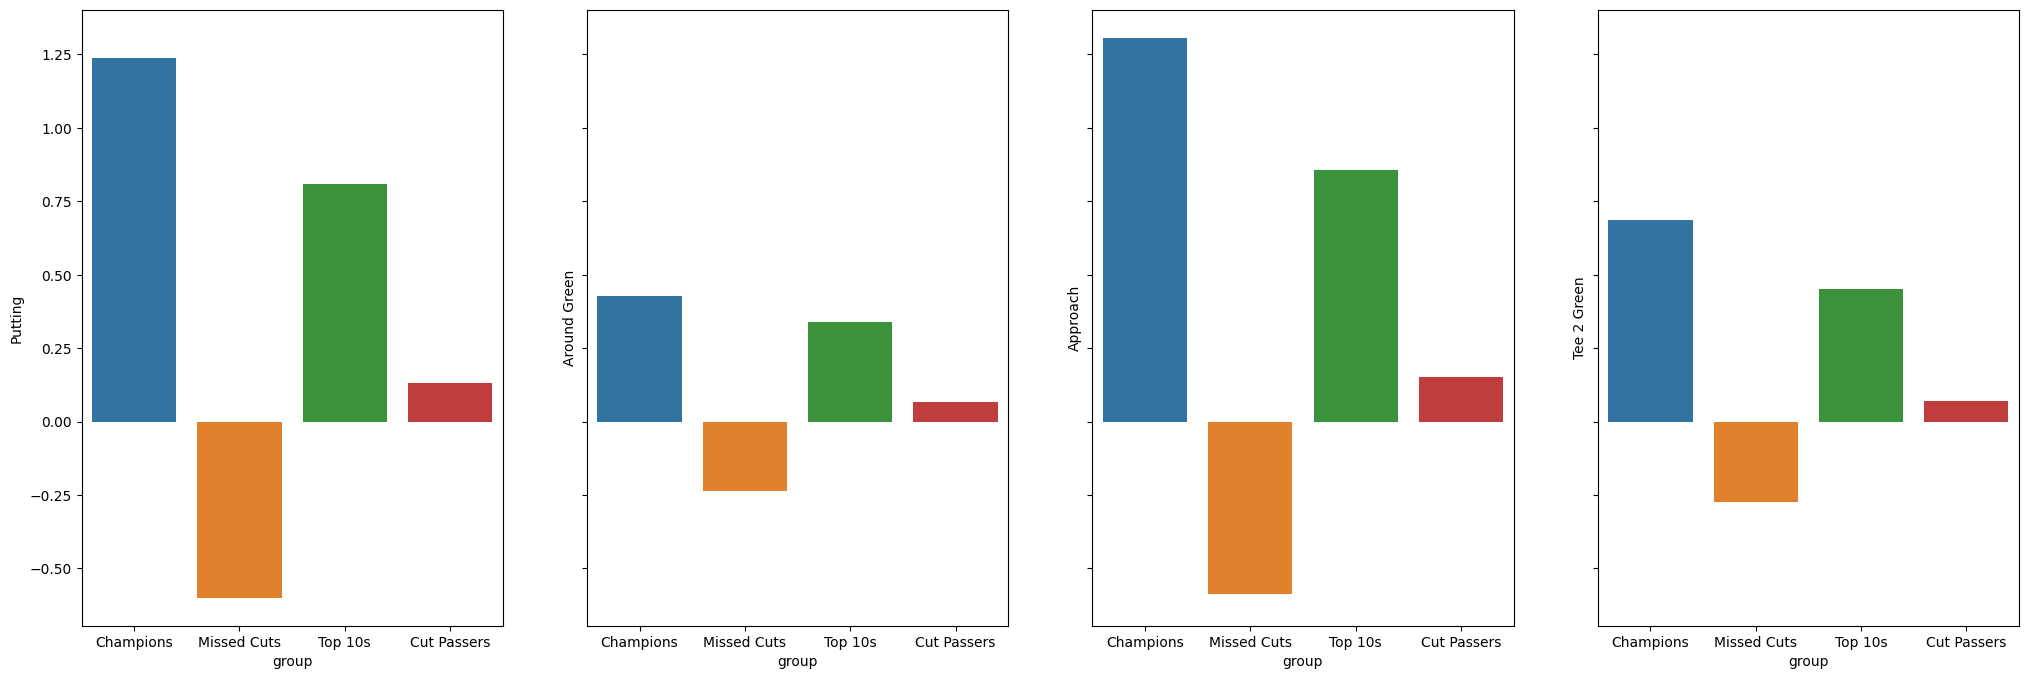

In [33]:
fig, axes = plt.subplots(1, 4, figsize=(25, 8), sharey=True)

#Putting
sns.barplot(ax=axes[0], x=means.group, y=means.Putting)

# ARound Green
sns.barplot(ax=axes[1], x=means.group, y=means['Around Green'])

# Approach
sns.barplot(ax=axes[2], x=means.group, y=means['Approach'])

# Tee 2 Green
sns.barplot(ax=axes[3], x=means.group, y=means['Tee 2 Green'])

In [34]:
# Bucketize and see correlation
golf['pos_cat'] = [1 if pos == 1 else 2 if pos in range(2,11) else 3 if pos in range(11,26) else 4 if pos in range(26, 50) else 5 if pos in range(50, 80) else 6 for pos in golf['Finish']]

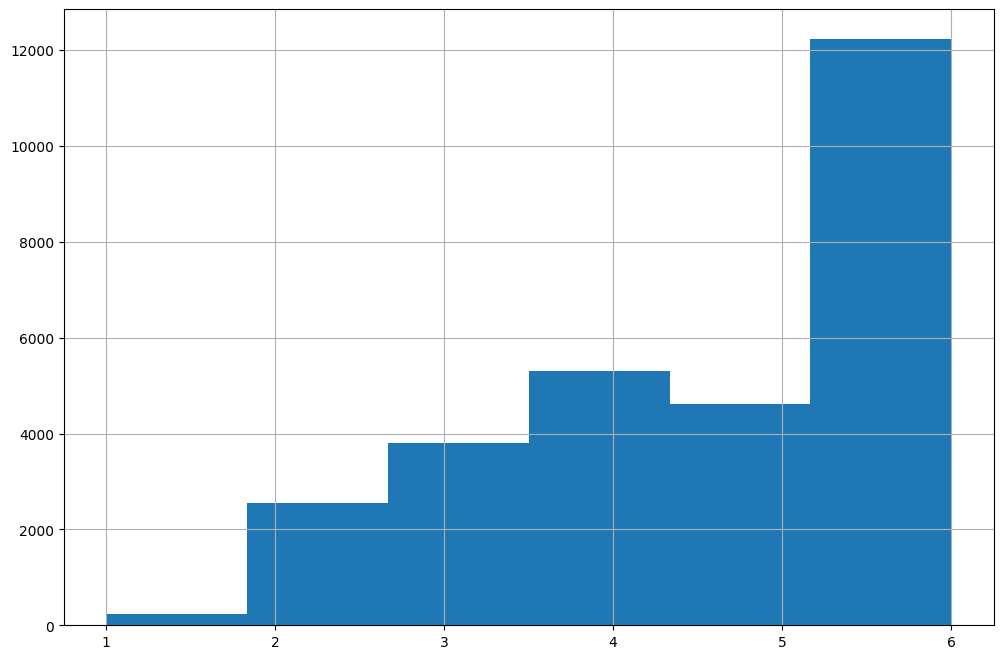

In [35]:
golf['pos_cat'].hist(bins=6, figsize=(12, 8))
plt.show()

<AxesSubplot: >

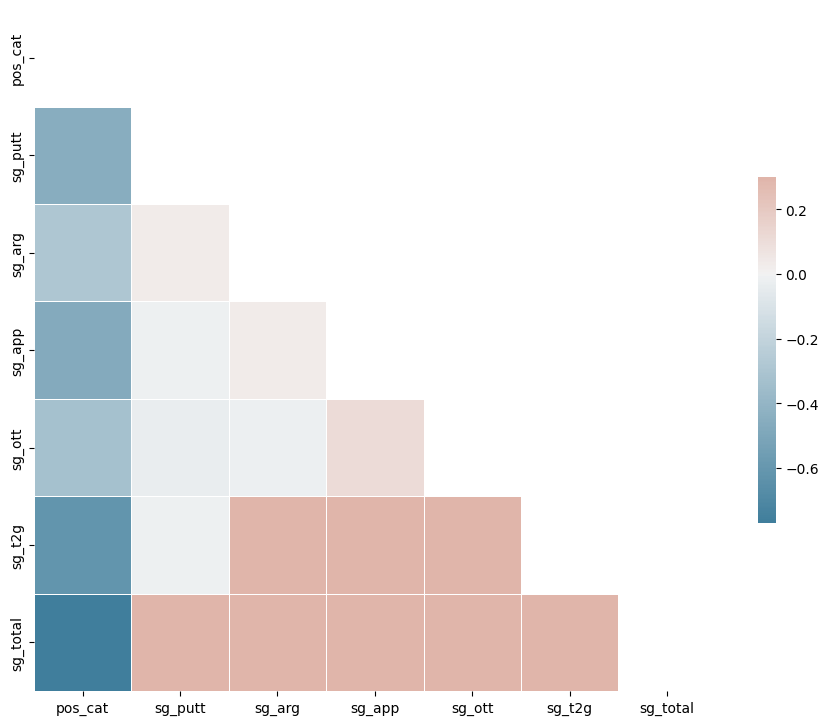

In [36]:
corr_mat = golf[['pos_cat', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
golf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28752 entries, 0 to 29179
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  28752 non-null  object 
 1   tournament id        28752 non-null  int64  
 2   player id            28752 non-null  int64  
 3   hole_par             28752 non-null  int64  
 4   strokes              28752 non-null  int64  
 5   player               28752 non-null  object 
 6   tournament name      28752 non-null  object 
 7   course               28752 non-null  object 
 8   date                 28752 non-null  object 
 9   season               28752 non-null  int64  
 10  no_cut               28752 non-null  int64  
 11  Finish               28752 non-null  int64  
 12  sg_putt              28752 non-null  float64
 13  sg_arg               28752 non-null  float64
 14  sg_app               28752 non-null  float64
 15  sg_ott               28752 non-null 

<AxesSubplot: >

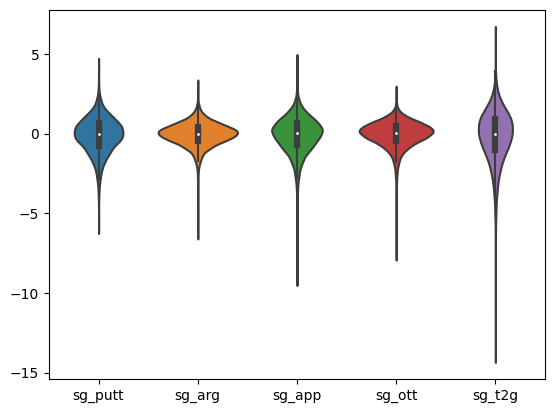

In [38]:
sns.violinplot(data=golf[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g']], figsize=(20,9))

<AxesSubplot: xlabel='sg_putt', ylabel='sg_arg'>

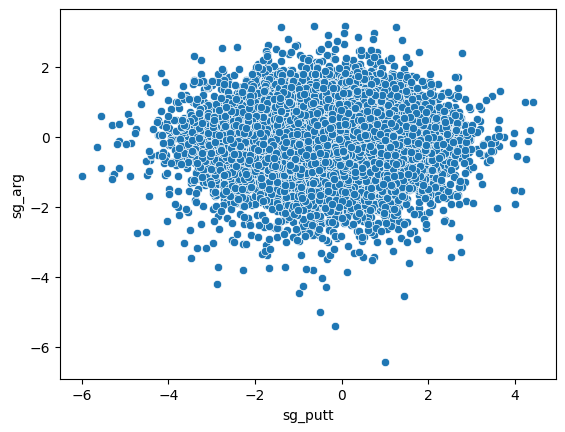

In [39]:
sns.scatterplot(golf, x='sg_putt', y='sg_arg')

In [40]:
from sklearn.cluster import KMeans

X = golf[['sg_putt', 'sg_arg']]

num_clusters = 4

kmeans = KMeans(random_state=0, n_init='auto').fit(X)

In [41]:
kmeans.cluster_centers_

array([[-0.16693587, -0.08612666],
       [-2.63066956, -0.07564166],
       [ 1.67056311, -0.00376417],
       [-0.61463555, -1.38385947],
       [-1.26620811, -0.21626486],
       [-0.72950281,  0.82340337],
       [ 0.70525631, -0.67385116],
       [ 0.5989355 ,  0.53464609]])

In [42]:
centroids = kmeans.cluster_centers_

In [43]:
len(centroids)

8

In [44]:
kmeans.labels_

array([0, 7, 5, ..., 7, 5, 6], dtype=int32)

In [45]:
# Add the four categories above
means

group   Putting  Around Green  Approach  Tee 2 Green     Total
0    Champions  1.236942      0.428017  1.306983     0.684793  2.420950
1  Missed Cuts -0.599545     -0.236824 -0.586360    -0.273155 -1.096428
2      Top 10s  0.807629      0.340325  0.856811     0.452856  1.650321
3  Cut Passers  0.130186      0.068172  0.151694     0.070096  0.290010

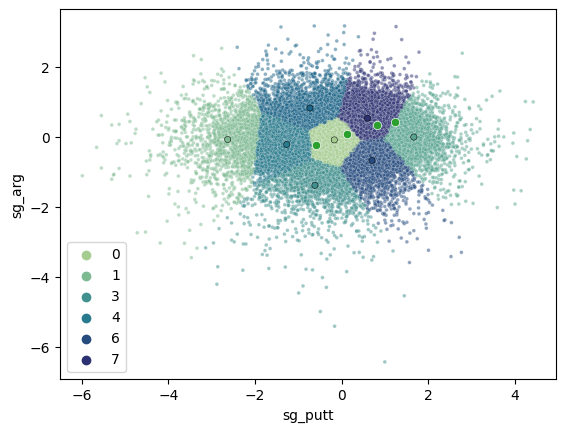

In [46]:
# colors = ['red', 'blue', 'purple', 'green']
ax = sns.scatterplot(X, x='sg_putt', y='sg_arg', hue=kmeans.labels_, palette=sns.color_palette('crest', as_cmap=True), alpha=0.5, s=7)
ax = sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
                     hue=range(len(centroids)), palette=sns.color_palette('crest', as_cmap=True), s=20, ec='black', legend=False, ax=ax)
ax = sns.scatterplot(x=[1.24, -0.6, 0.81, 0.13], y=[0.43, -0.24, 0.34, 0.068])
plt.show()

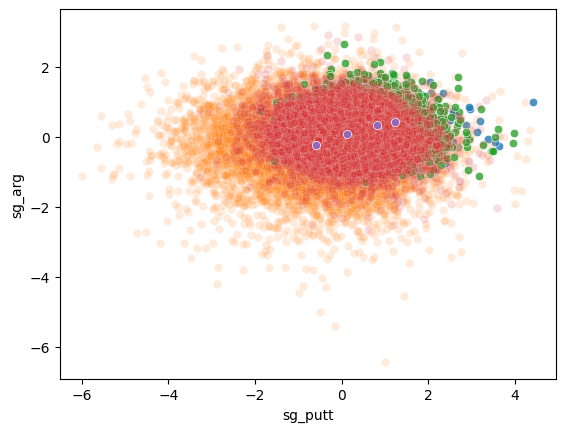

In [47]:
# colors = ['red', 'blue', 'purple', 'green']
ax = sns.scatterplot(winners, x='sg_putt', y='sg_arg', alpha=0.8)
ax = sns.scatterplot(missed_cuts, x='sg_putt', y='sg_arg', alpha=0.15)
ax = sns.scatterplot(top10s, x='sg_putt', y='sg_arg', alpha=0.8)
ax = sns.scatterplot(cut_passers, x='sg_putt', y='sg_arg', alpha=0.15)

ax = sns.scatterplot(x=[1.24, -0.6, 0.81, 0.13], y=[0.43, -0.24, 0.34, 0.068])

plt.show()

In [48]:
golf.head()

Player_initial_last  tournament id  player id  hole_par  strokes  \
0            A. Ancer      401353224       9261       288      289   
1           A. Hadwin      401353224       5548       288      286   
2           A. Lahiri      401353224       4989       144      147   
3             A. Long      401353224       6015       144      151   
4            A. Noren      401353224       3832       144      148   

            player                              tournament name  \
0    Abraham Ancer  The Memorial Tournament pres. by Nationwide   
1      Adam Hadwin  The Memorial Tournament pres. by Nationwide   
2   Anirban Lahiri  The Memorial Tournament pres. by Nationwide   
3        Adam Long  The Memorial Tournament pres. by Nationwide   
4  Alexander Noren  The Memorial Tournament pres. by Nationwide   

                                     course        date  season  no_cut  \
0  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
1  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
2  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
3  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
4  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   

   Finish  sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  sg_total  pos_cat  
0      32     0.20   -0.13   -0.08    0.86    0.65      0.85        4  
1      18     0.36    0.75    0.31    0.18    1.24      1.60        3  
2       0    -0.56    0.74   -1.09    0.37    0.02     -0.54        6  
3       0    -1.46   -1.86   -0.02    0.80   -1.08     -2.54        6  
4       0     0.53   -0.36   -1.39    0.19   -1.56     -1.04        6

In [49]:
len(golf)

28752

In [16]:
golf['cat'] = ['Winner' if val == 1 else 'Top 10' if val in range(2,11) else 'Top 25' if val in range(11,26) else 'Passed Cut' if val in range(26, 80) else 'Missed Cut' for val in golf['Finish']]

In [51]:
golf.head()

Player_initial_last  tournament id  player id  hole_par  strokes  \
0            A. Ancer      401353224       9261       288      289   
1           A. Hadwin      401353224       5548       288      286   
2           A. Lahiri      401353224       4989       144      147   
3             A. Long      401353224       6015       144      151   
4            A. Noren      401353224       3832       144      148   

            player                              tournament name  \
0    Abraham Ancer  The Memorial Tournament pres. by Nationwide   
1      Adam Hadwin  The Memorial Tournament pres. by Nationwide   
2   Anirban Lahiri  The Memorial Tournament pres. by Nationwide   
3        Adam Long  The Memorial Tournament pres. by Nationwide   
4  Alexander Noren  The Memorial Tournament pres. by Nationwide   

                                     course        date  season  no_cut  \
0  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
1  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
2  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
3  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
4  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   

   Finish  sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  sg_total  pos_cat  \
0      32     0.20   -0.13   -0.08    0.86    0.65      0.85        4   
1      18     0.36    0.75    0.31    0.18    1.24      1.60        3   
2       0    -0.56    0.74   -1.09    0.37    0.02     -0.54        6   
3       0    -1.46   -1.86   -0.02    0.80   -1.08     -2.54        6   
4       0     0.53   -0.36   -1.39    0.19   -1.56     -1.04        6   

          cat  
0  Passed Cut  
1      Top 25  
2  Missed Cut  
3  Missed Cut  
4  Missed Cut

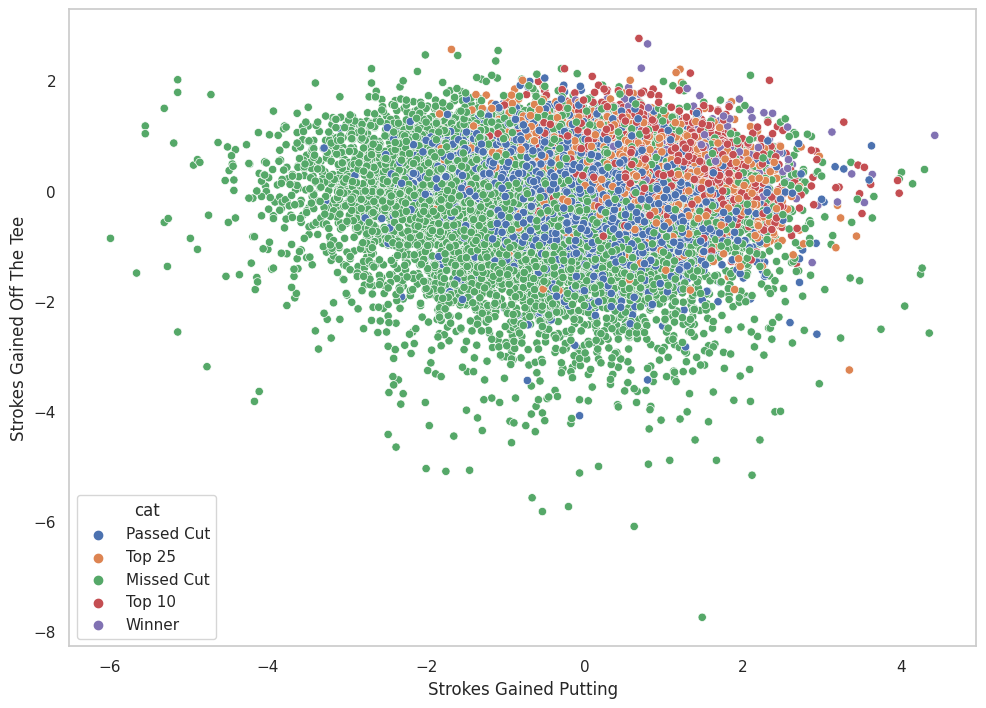

In [184]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.scatterplot(data=golf, x='sg_putt', y='sg_ott', hue='cat')
plt.xlabel("Strokes Gained Putting")
plt.ylabel("Strokes Gained Off The Tee")
plt.show()

fig = ax.get_figure()
fig.savefig('scatte1r.png')

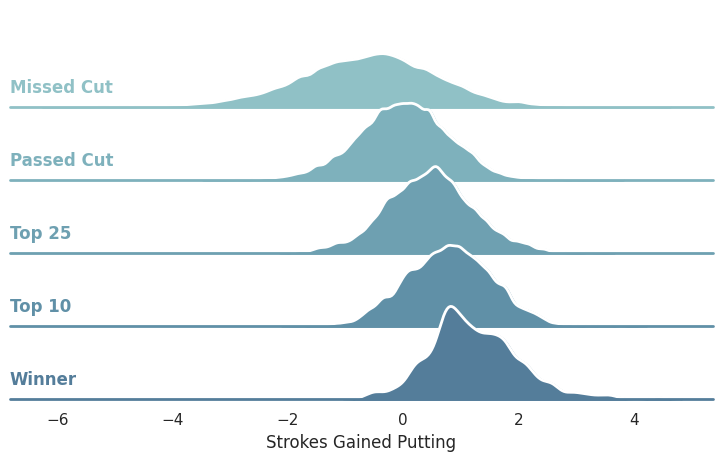

In [144]:
# Initialize the FacetGrid object
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(golf.sort_values('sg_putt'), row="cat", hue="cat", aspect=8, height=1., palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "sg_putt",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'sg_putt', clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'sg_putt')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel="Strokes Gained Putting")
g.despine(bottom=True, left=True)

g.savefig('test.png')

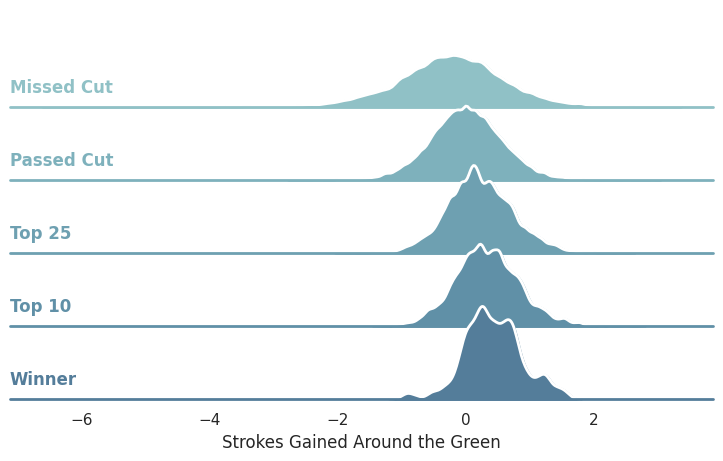

In [161]:
# Initialize the FacetGrid object
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(golf.sort_values('sg_arg'), row="cat", hue="cat", aspect=8, height=1., palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "sg_arg",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'sg_arg', clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'sg_arg')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel="Strokes Gained Around the Green")
g.despine(bottom=True, left=True)

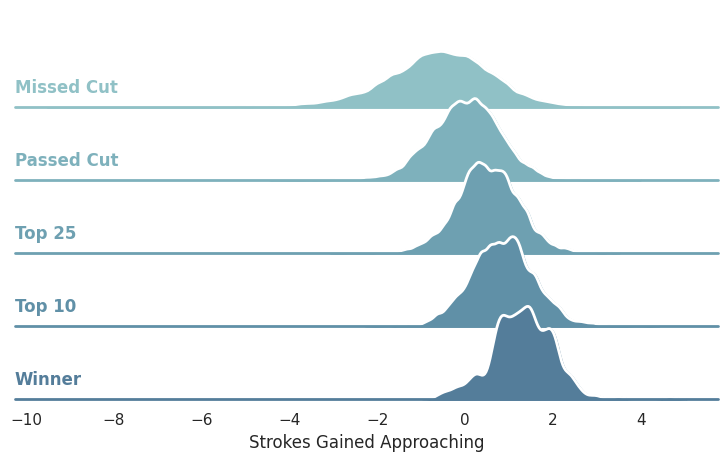

In [160]:
# Initialize the FacetGrid object
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(golf.sort_values('sg_putt'), row="cat", hue="cat", aspect=8, height=1., palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "sg_app",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'sg_app', clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'sg_app')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel="Strokes Gained Approaching")
g.despine(bottom=True, left=True)

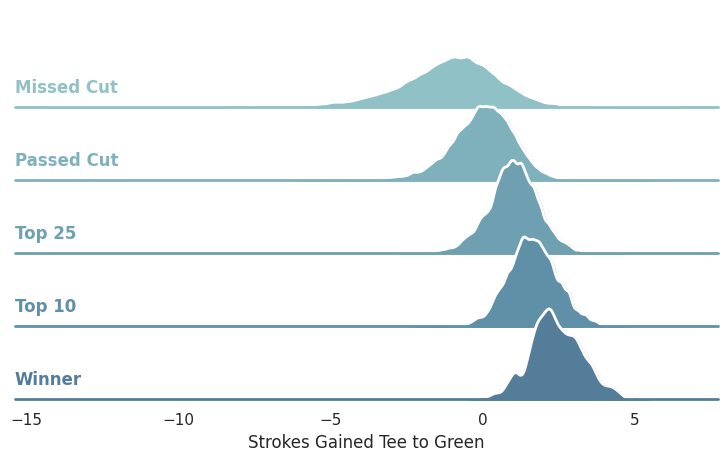

In [159]:
# Initialize the FacetGrid object
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(golf.sort_values('sg_putt'), row="cat", hue="cat", aspect=8, height=1., palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "sg_t2g",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'sg_t2g', clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'sg_t2g')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel="Strokes Gained Tee to Green")
g.despine(bottom=True, left=True)

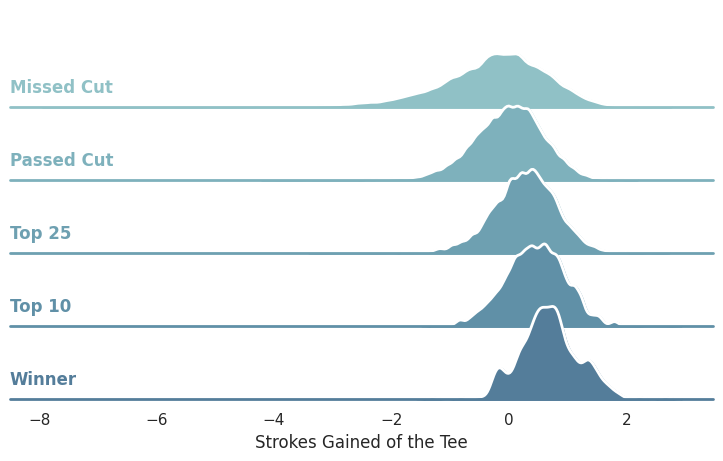

In [163]:
# Initialize the FacetGrid object
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(golf.sort_values('sg_ott'), row="cat", hue="cat", aspect=8, height=1., palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "sg_ott",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'sg_ott', clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'sg_ott')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel="Strokes Gained of the Tee")
g.despine(bottom=True, left=True)

g.savefig('driver.png')

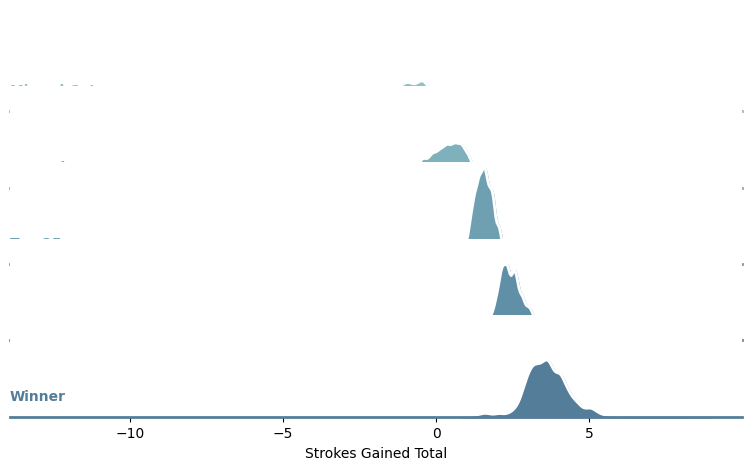

In [58]:
# Initialize the FacetGrid object
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(golf.sort_values('sg_total'), row="cat", hue="cat", aspect=8, height=1., palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "sg_total",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'sg_total', clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'sg_total')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel="Strokes Gained Total")
g.despine(bottom=True, left=True)

In [59]:
#### Misma Grafica para 5 jugadores con mas victorias de los años analizados 
golf.loc[golf['Finish'] == 1]['player'].value_counts().head(20)

Dustin Johnson       12
Justin Thomas         9
Bryson DeChambeau     8
Jordan Spieth         7
Rory McIlroy          7
Jason Day             7
Patrick Cantlay       6
Brooks Koepka         5
Jon Rahm              5
Hideki Matsuyama      4
Max Homa              4
Daniel Berger         4
Sam Burns             3
Jim Herman            3
Jason Kokrak          3
Phil Mickelson        3
Cameron Champ         3
Rickie Fowler         3
Collin Morikawa       3
Webb Simpson          3
Name: player, dtype: int64

In [28]:
list_champions = ['Dustin Johnson', 'Justin Thomas', 'Bryson DeChambeau', 'Jordan Spieth', 'Rory McIlroy', 'Jason Day', 'Patrick Cantlay', 'Jon Rahm', 'Hideki Matsuyama']
list_champions_red = ['Dustin Johnson', 'Justin Thomas', 'Rory McIlroy', 'Patrick Cantlay', 'Jon Rahm']

In [29]:
golf_champs = golf.loc[golf['player'].isin(list_champions)]
golf_champs_red = golf.loc[golf['player'].isin(list_champions_red)]

In [62]:
golf_champs.player.value_counts()

Justin Thomas        129
Jordan Spieth        125
Hideki Matsuyama     122
Dustin Johnson       107
Jason Day            102
Bryson DeChambeau    102
Jon Rahm              91
Patrick Cantlay       84
Rory McIlroy          82
Name: player, dtype: int64

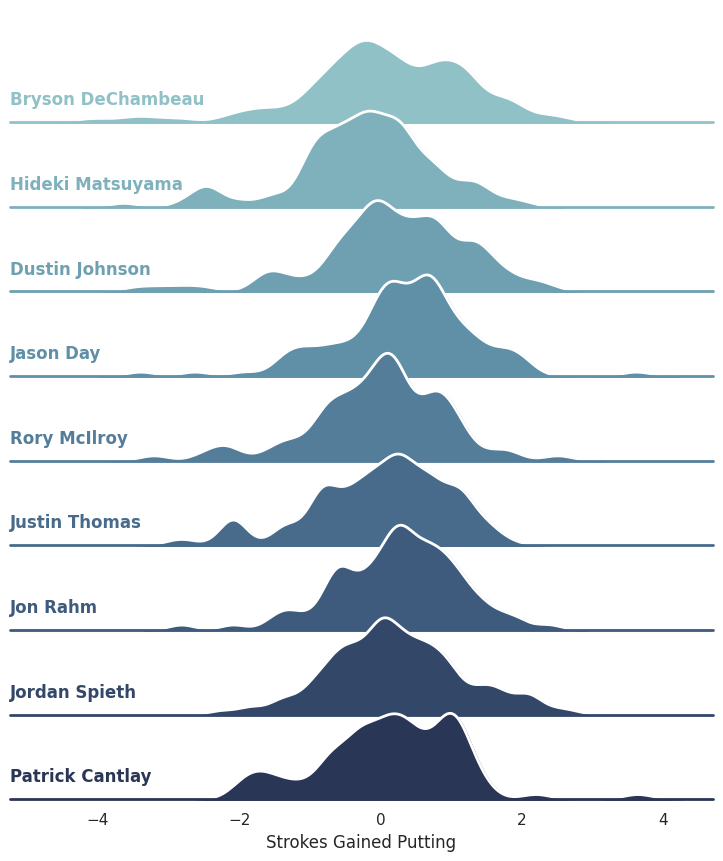

In [31]:
# Initialize the FacetGrid object
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(golf_champs.sort_values('sg_putt'), row="player", hue="player", aspect=8, height=1., palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "sg_putt",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'sg_putt', clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'sg_putt')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel="Strokes Gained Putting")
g.despine(bottom=True, left=True)

g.savefig('test2.png')

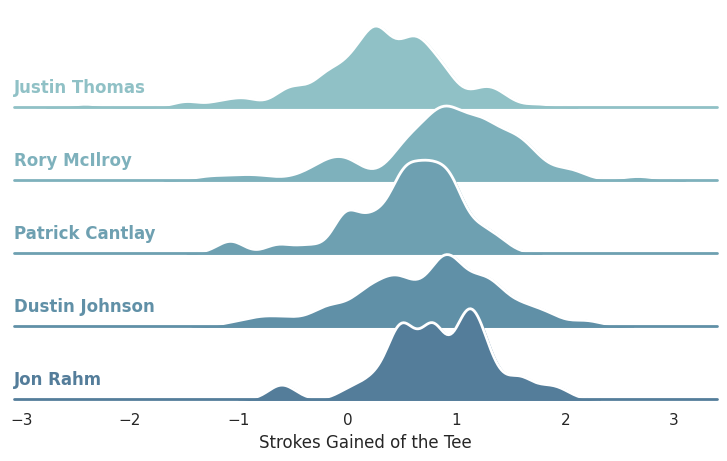

In [173]:
# Initialize the FacetGrid object
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(golf_champs_red.sort_values('sg_ott'), row="player", hue="player", aspect=8, height=1., palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "sg_ott",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'sg_ott', clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'sg_ott')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel="Strokes Gained of the Tee")
g.despine(bottom=True, left=True)

g.savefig('driving_p.png')

In [32]:
golf.columns

Index(['Player_initial_last', 'tournament id', 'player id', 'hole_par',
       'strokes', 'player', 'tournament name', 'course', 'date', 'season',
       'no_cut', 'Finish', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g',
       'sg_total', 'cat'],
      dtype='object')

In [33]:
golf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28752 entries, 0 to 29179
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  28752 non-null  object 
 1   tournament id        28752 non-null  int64  
 2   player id            28752 non-null  int64  
 3   hole_par             28752 non-null  int64  
 4   strokes              28752 non-null  int64  
 5   player               28752 non-null  object 
 6   tournament name      28752 non-null  object 
 7   course               28752 non-null  object 
 8   date                 28752 non-null  object 
 9   season               28752 non-null  int64  
 10  no_cut               28752 non-null  int64  
 11  Finish               28752 non-null  int64  
 12  sg_putt              28752 non-null  float64
 13  sg_arg               28752 non-null  float64
 14  sg_app               28752 non-null  float64
 15  sg_ott               28752 non-null 

In [64]:
# Let's look at the masters and take 1, 11, 21, 31, 41, 51, 61, 71 pos  & (golf['Finish'].isin([1,11,21,31,41,51])

# # 
#     Masters Tournament
#     PGA Championship
#     The Open
#     U.S. Open


masters = golf.loc[(golf['tournament name'] == 'Masters Tournament') & (golf['season'] == 2022) & (golf['Finish'].isin([1,8,14,23,43,50]))]

In [65]:
masters.head()

Player_initial_last  tournament id  player id  hole_par  strokes  \
862         B. Horschel      401353232       1651       288      296   
874           D. Berger      401353232       9025       288      303   
882            H. Higgs      401353232       4844       288      290   
883        H. Matsuyama      401353232       5860       288      290   
885       H. Varner III      401353232       6991       288      291   

                player     tournament name  \
862     Billy Horschel  Masters Tournament   
874      Daniel Berger  Masters Tournament   
882        Harry Higgs  Masters Tournament   
883   Hideki Matsuyama  Masters Tournament   
885  Harold Varner III  Masters Tournament   

                                       course        date  season  no_cut  \
862  Augusta National Golf Club - Augusta, GA  2022-04-10    2022       0   
874  Augusta National Golf Club - Augusta, GA  2022-04-10    2022       0   
882  Augusta National Golf Club - Augusta, GA  2022-04-10    2022       0   
883  Augusta National Golf Club - Augusta, GA  2022-04-10    2022       0   
885  Augusta National Golf Club - Augusta, GA  2022-04-10    2022       0   

     Finish  sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  sg_total         cat  
862      43     0.06   -0.57    0.83   -0.46   -0.20     -0.14  Passed Cut  
874      50    -0.39   -0.03   -0.57   -0.90   -1.51     -1.90  Passed Cut  
882      14    -0.35   -0.10    1.69    0.11    1.70      1.35      Top 25  
883      14    -0.76    1.14    0.28    0.70    2.11      1.35      Top 25  
885      23     0.51    0.19    0.08    0.32    0.59      1.10      Top 25

In [66]:
masters['Finish'].value_counts()

14    8
23    3
50    2
8     2
43    1
1     1
Name: Finish, dtype: int64

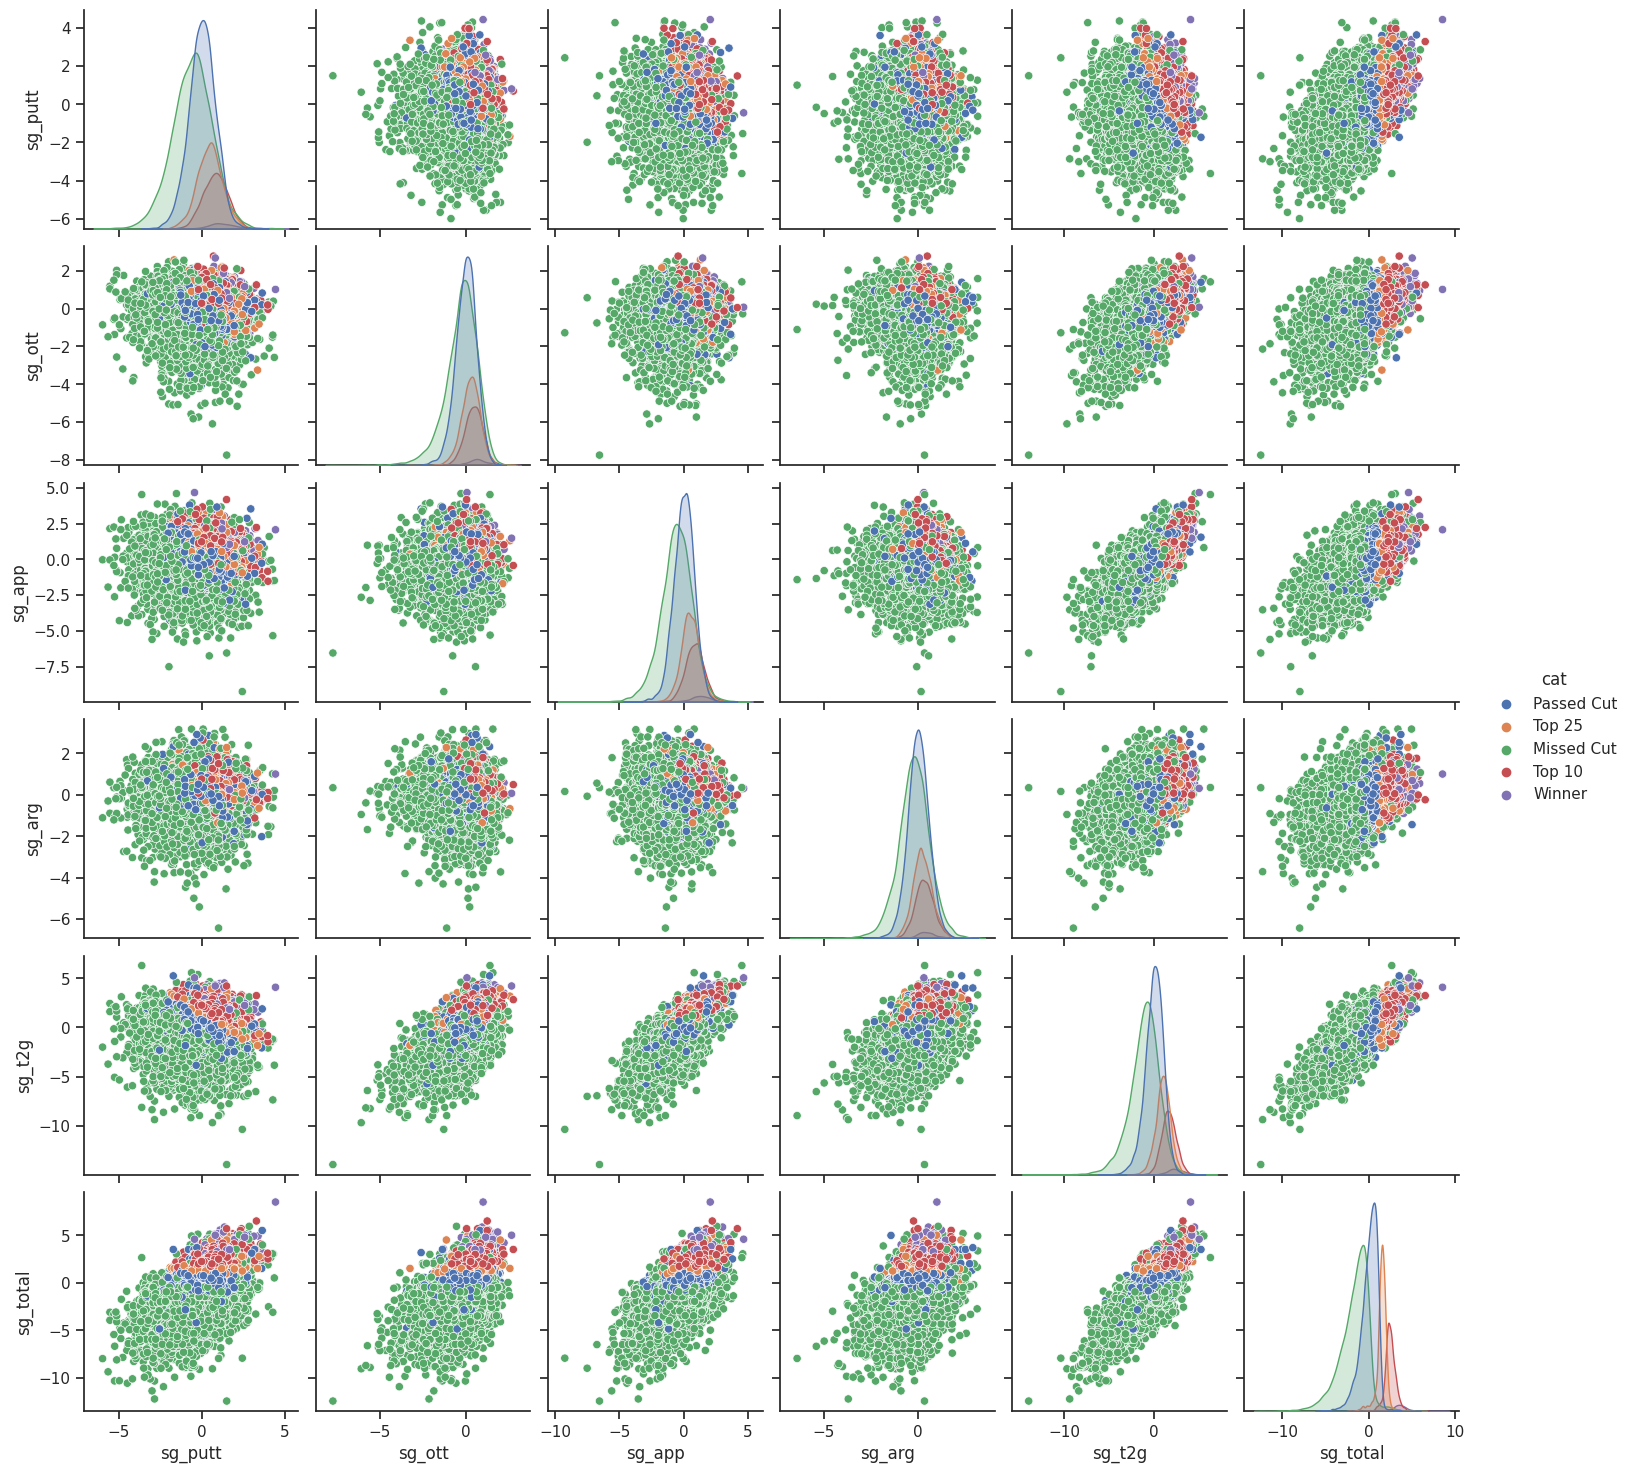

In [72]:
sns.set_theme(style="ticks")

df = golf[['sg_putt', 'sg_ott', 'sg_app', 'sg_arg', 'sg_t2g', 'sg_total', 'cat']]
sns.pairplot(df, hue='cat')

<AxesSubplot: >

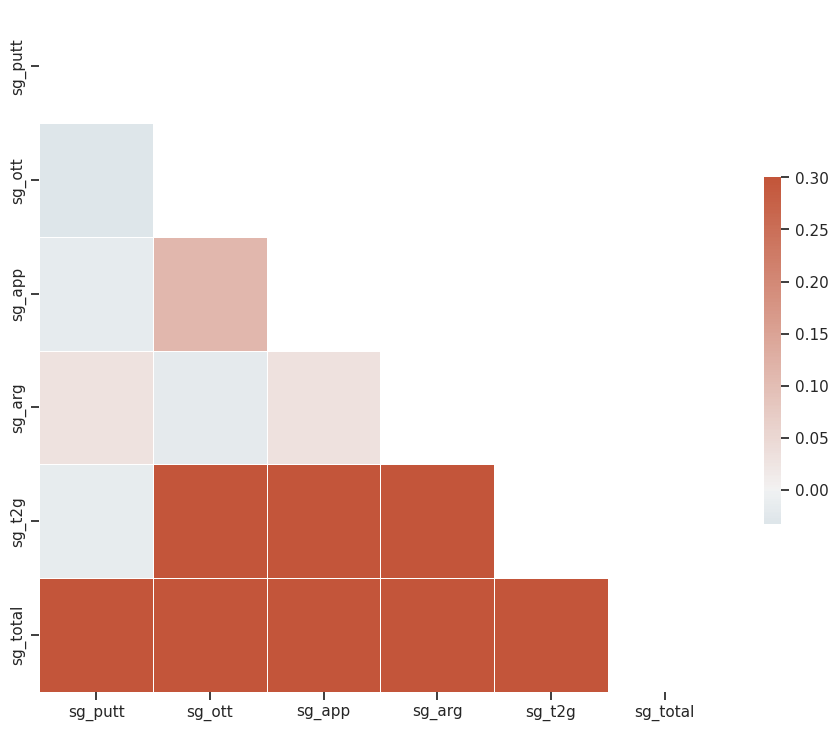

In [74]:
corr = golf[['sg_putt', 'sg_ott', 'sg_app', 'sg_arg', 'sg_t2g', 'sg_total', 'cat']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

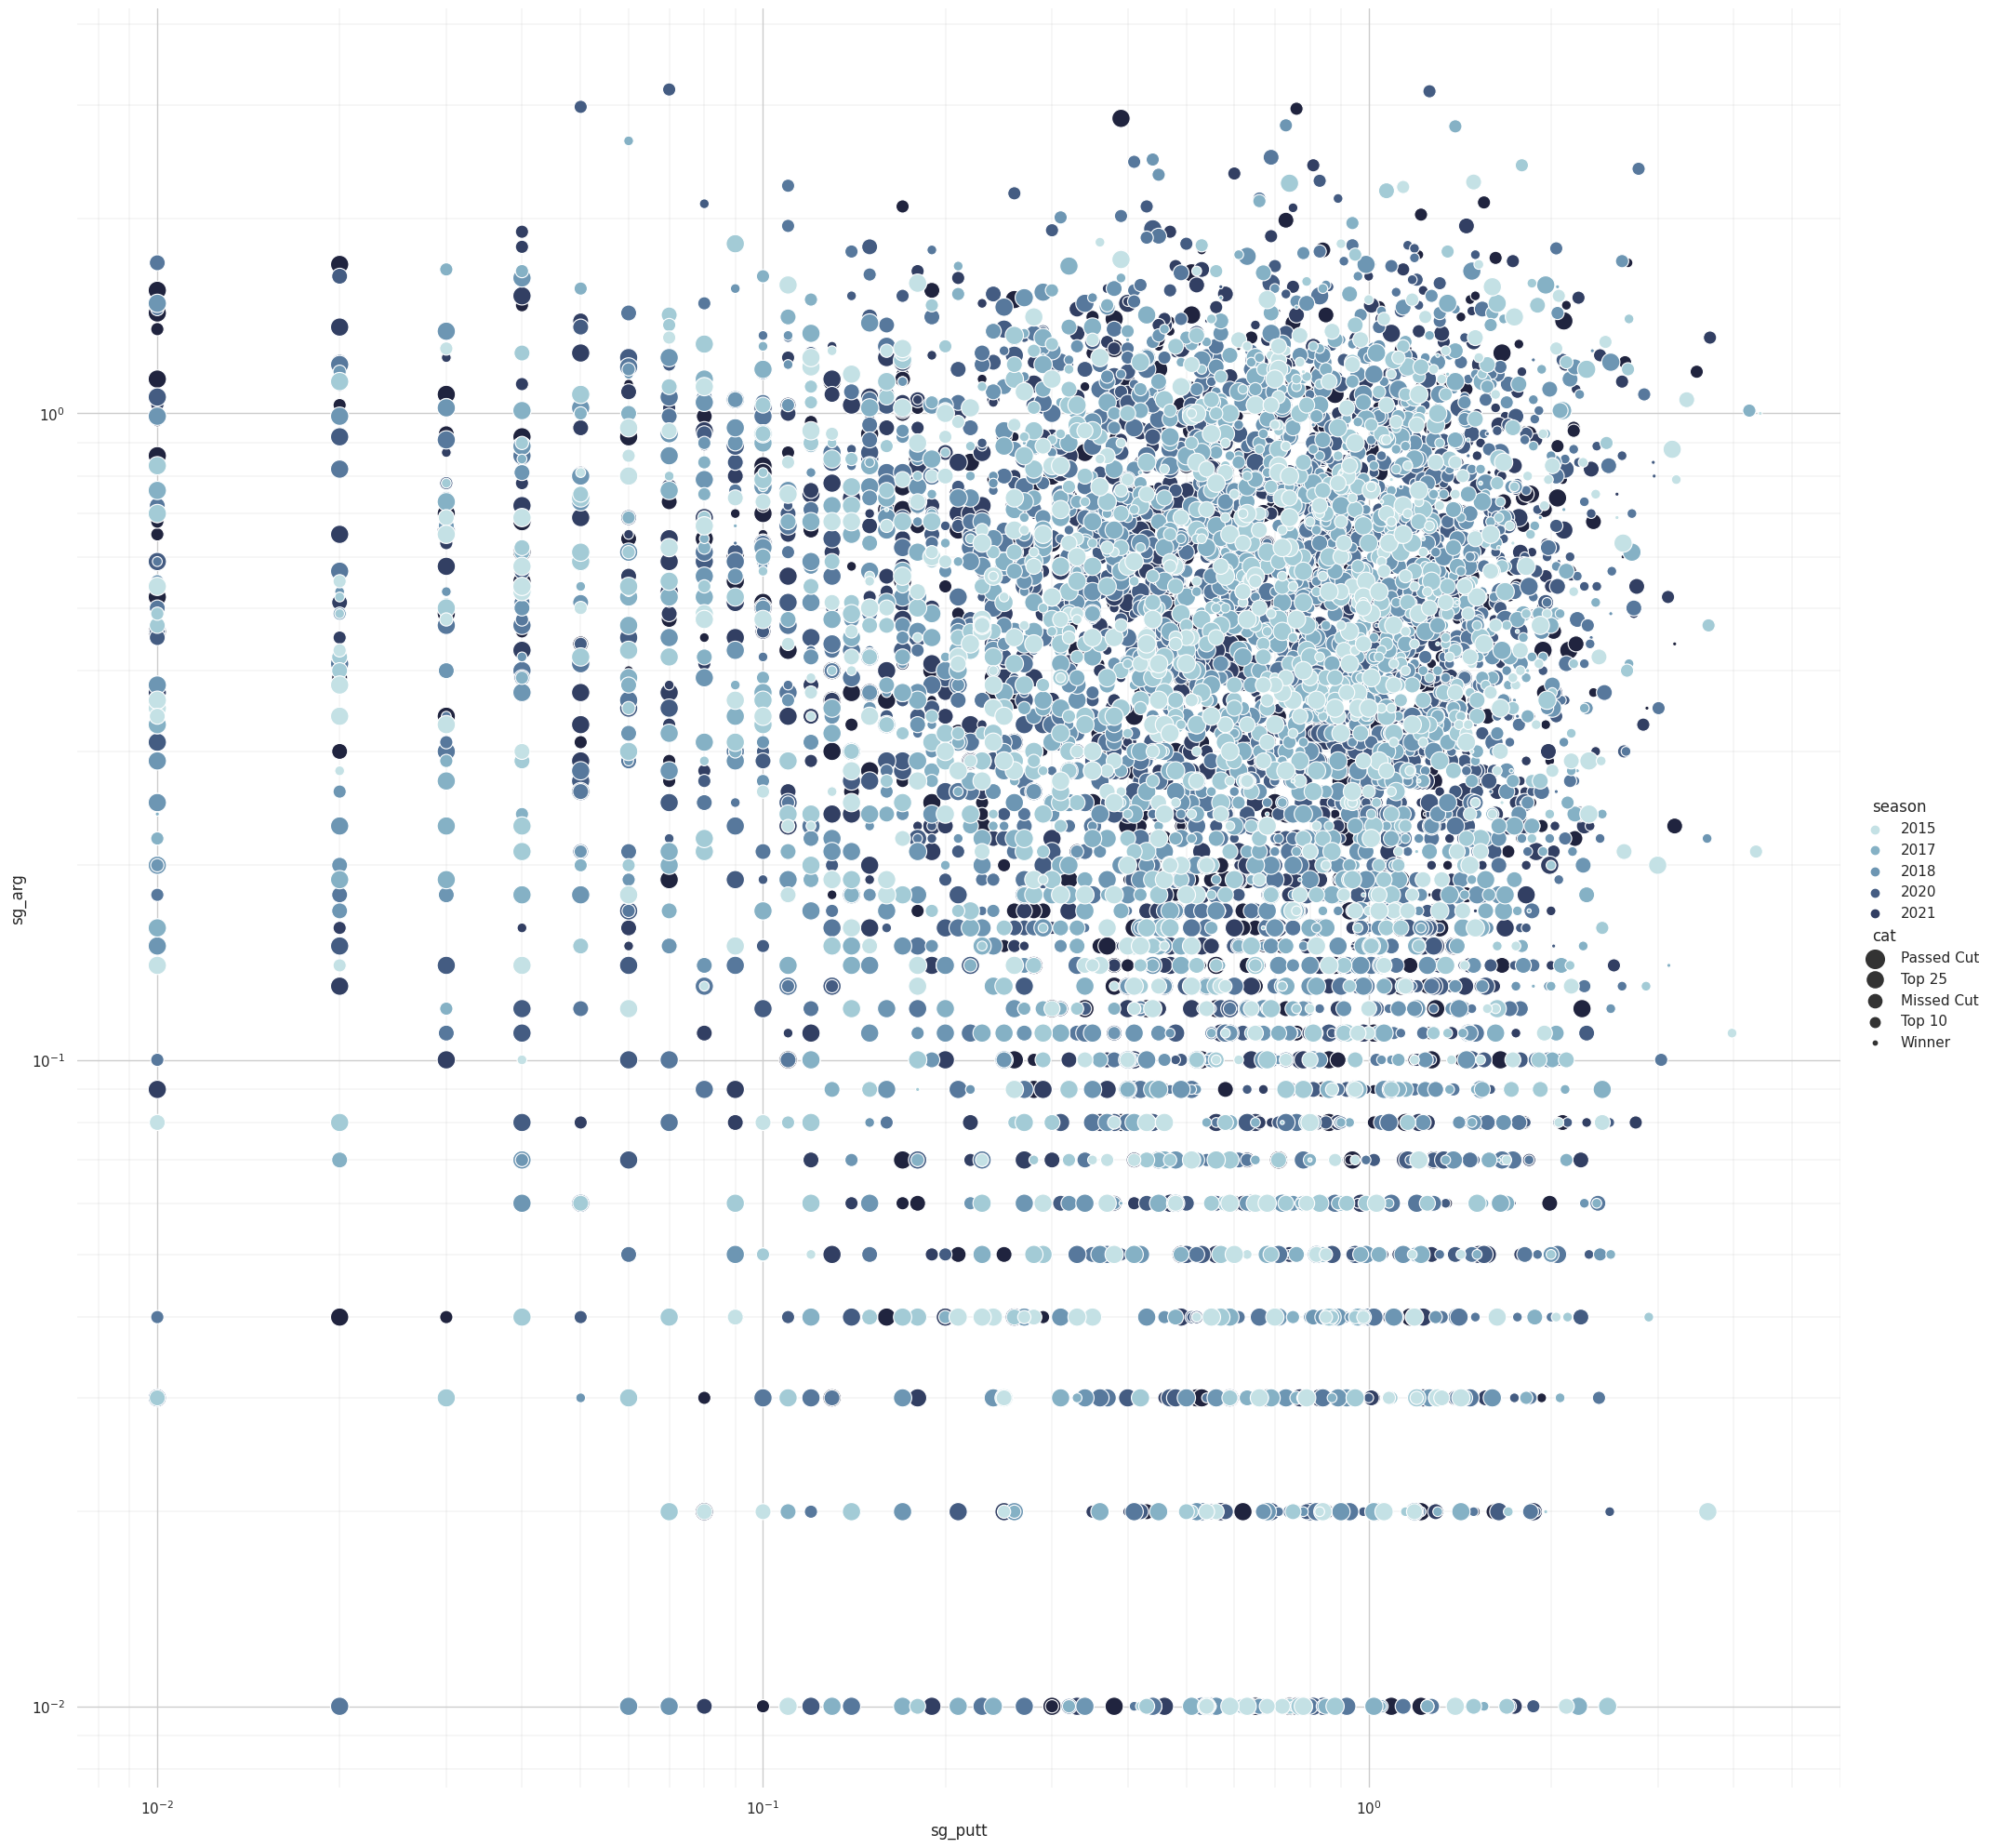

In [76]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=golf,
    x='sg_putt', y='sg_arg',
    hue='season', size='cat',
    palette=cmap, sizes=(10, 200), height = 20
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [94]:
# Line plot con los averages de los ganadores en cada torneo

winners_and_missedcuts = golf.loc[golf['cat'].isin(['Winner', 'Missed Cut'])].sort_values('date')

In [96]:
winners_and_missedcuts.head()

Player_initial_last  tournament id  player id  hole_par  strokes  \
29179           Z. Sucher           2260       4708       142      142   
29121           J. Thomas           2260       4848       142      142   
29117           J. Kokrak           2260       3317       142      143   
29113             J. Hahn           2260       5025       142      141   
29108           H. Frazar           2260        144       142      144   

                player                      tournament name  \
29179      Zack Sucher  Shriners Hospital for Children Open   
29121    Justin Thomas  Shriners Hospital for Children Open   
29117     Jason Kokrak  Shriners Hospital for Children Open   
29113       James Hahn  Shriners Hospital for Children Open   
29108  Harrison Frazar  Shriners Hospital for Children Open   

                              course        date  season  no_cut  Finish  \
29179  TPC Summerlin - Las Vegas, NV  2014-10-19    2015       0       0   
29121  TPC Summerlin - Las Vegas, NV  2014-10-19    2015       0       0   
29117  TPC Summerlin - Las Vegas, NV  2014-10-19    2015       0       0   
29113  TPC Summerlin - Las Vegas, NV  2014-10-19    2015       0       0   
29108  TPC Summerlin - Las Vegas, NV  2014-10-19    2015       0       0   

       sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  sg_total         cat  
29179     1.15   -1.38   -0.38   -0.34   -2.10     -0.95  Missed Cut  
29121     0.39    0.47   -1.66   -0.15   -1.34     -0.95  Missed Cut  
29117    -0.17   -1.21    1.35   -1.42   -1.28     -1.45  Missed Cut  
29113    -0.23    0.29   -1.10    0.59   -0.22     -0.45  Missed Cut  
29108    -0.91   -1.76   -0.74    1.46   -1.04     -1.95  Missed Cut

<AxesSubplot: xlabel='date', ylabel='sg_putt'>

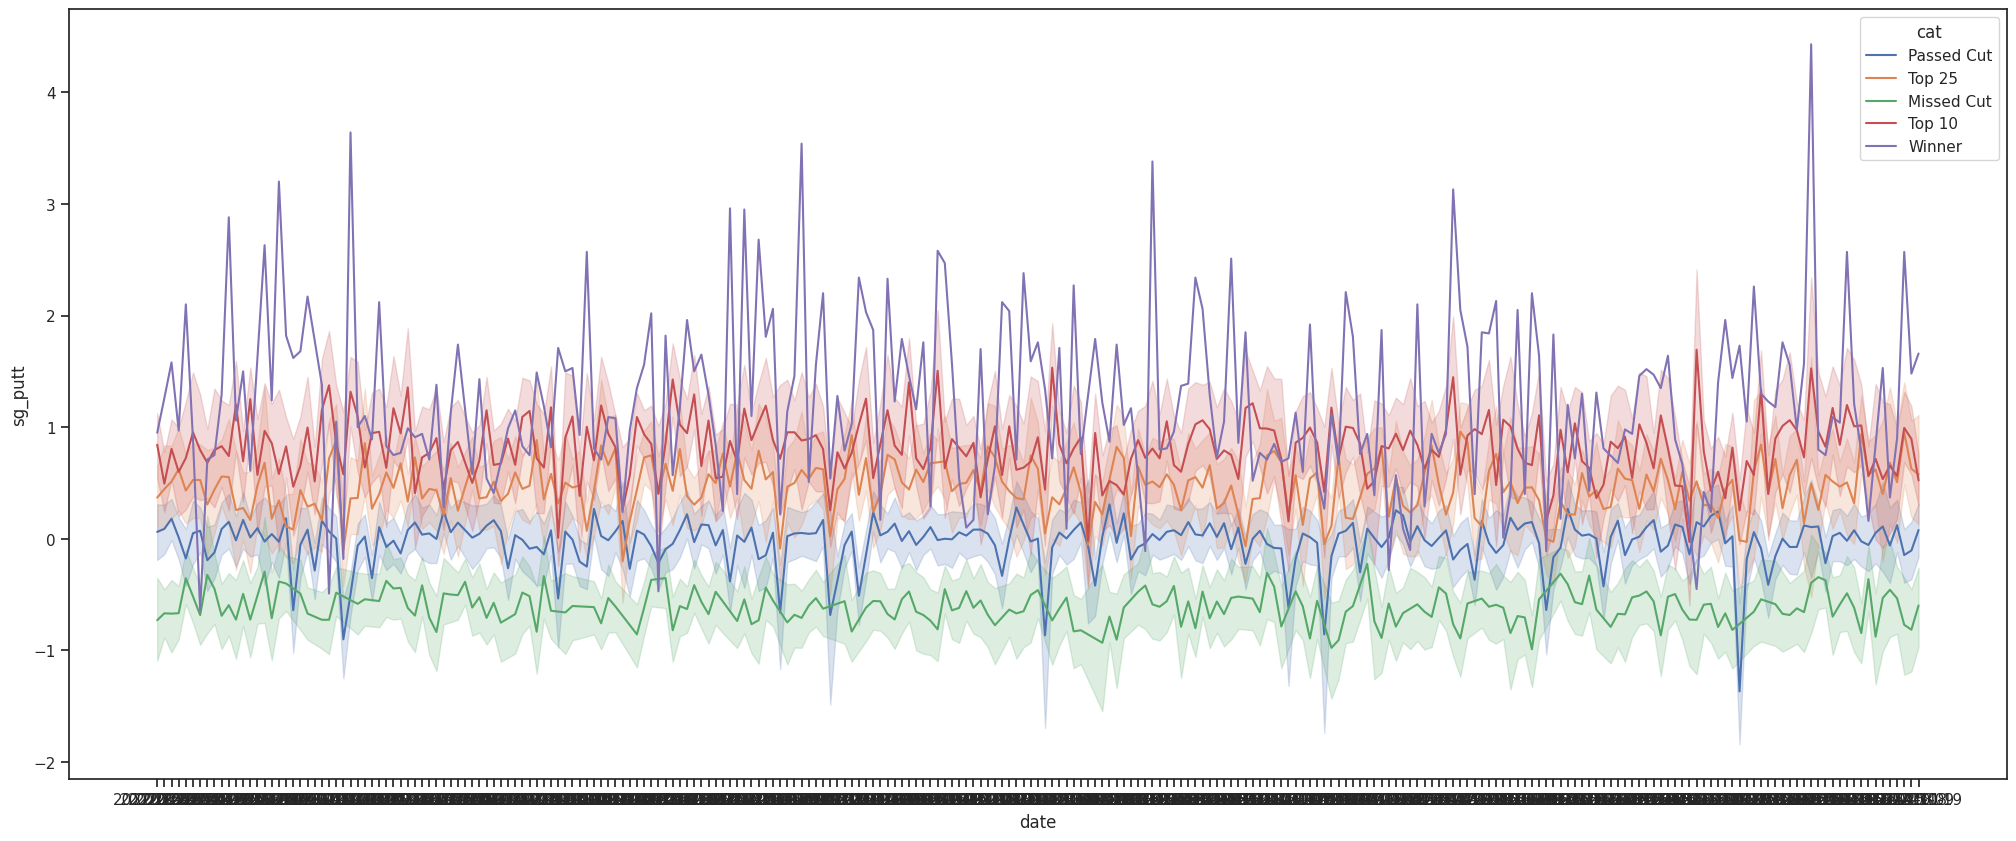

In [101]:
sns.set_style('ticks')
plt.figure(figsize=(25,10))
sns.lineplot(data=golf, x='date', y='sg_putt', hue='cat')

In [112]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = golf[['sg_putt', 'sg_arg', 'sg_ott', 'sg_t2g', 'sg_app', 'sg_total']]

std_scaler = StandardScaler()

scaled_golf = pd.DataFrame(std_scaler.fit_transform(golf[['sg_putt', 'sg_arg', 'sg_ott', 'sg_t2g', 'sg_app', 'sg_total']])).reset_index(drop=True)

scaled_golf.columns = cols_to_scale.columns

In [113]:
scaled_golf.head()

sg_putt    sg_arg    sg_ott    sg_t2g    sg_app  sg_total
0  0.282229 -0.131019  1.130876  0.505549  0.010104  0.582720
1  0.426680  1.090570  0.274086  0.871847  0.362927  0.971666
2 -0.403913  1.076688  0.513483  0.114418 -0.903617 -0.138128
3 -1.216450 -2.532551  1.055277 -0.568509  0.064384 -1.175320
4  0.580160 -0.450297  0.286686 -0.866513 -1.175020 -0.397426

In [121]:
scaled_comp = pd.concat([golf[['date', 'season', 'cat']], scaled_golf], axis=1)

In [117]:
scaled_comp.head()

date         cat   sg_putt    sg_arg    sg_ott    sg_t2g    sg_app  \
0  2022-06-05  Passed Cut  0.282229 -0.131019  1.130876  0.505549  0.010104   
1  2022-06-05      Top 25  0.426680  1.090570  0.274086  0.871847  0.362927   
2  2022-06-05  Missed Cut -0.403913  1.076688  0.513483  0.114418 -0.903617   
3  2022-06-05  Missed Cut -1.216450 -2.532551  1.055277 -0.568509  0.064384   
4  2022-06-05  Missed Cut  0.580160 -0.450297  0.286686 -0.866513 -1.175020   

   sg_total  
0  0.582720  
1  0.971666  
2 -0.138128  
3 -1.175320  
4 -0.397426

<AxesSubplot: xlabel='season', ylabel='sg_putt'>

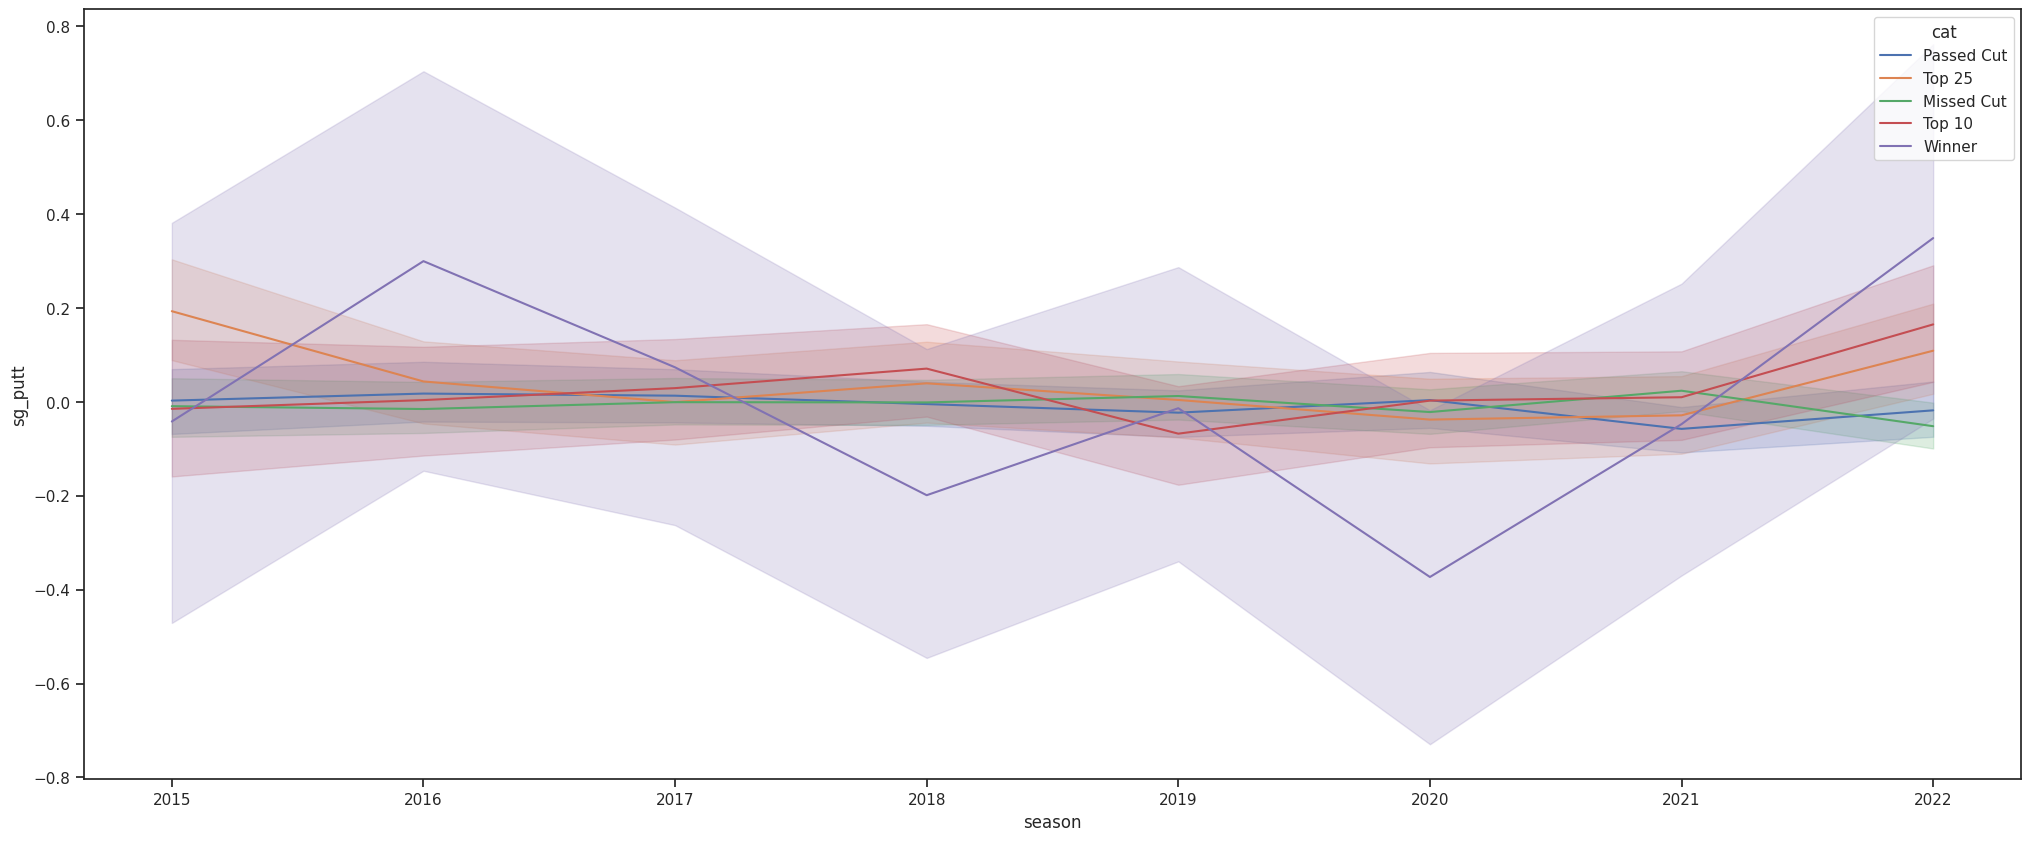

In [122]:
sns.set_style('ticks')
plt.figure(figsize=(25,10))
sns.lineplot(data=scaled_comp, x='season', y='sg_putt', hue='cat')

<AxesSubplot: xlabel='season', ylabel='sg_ott'>

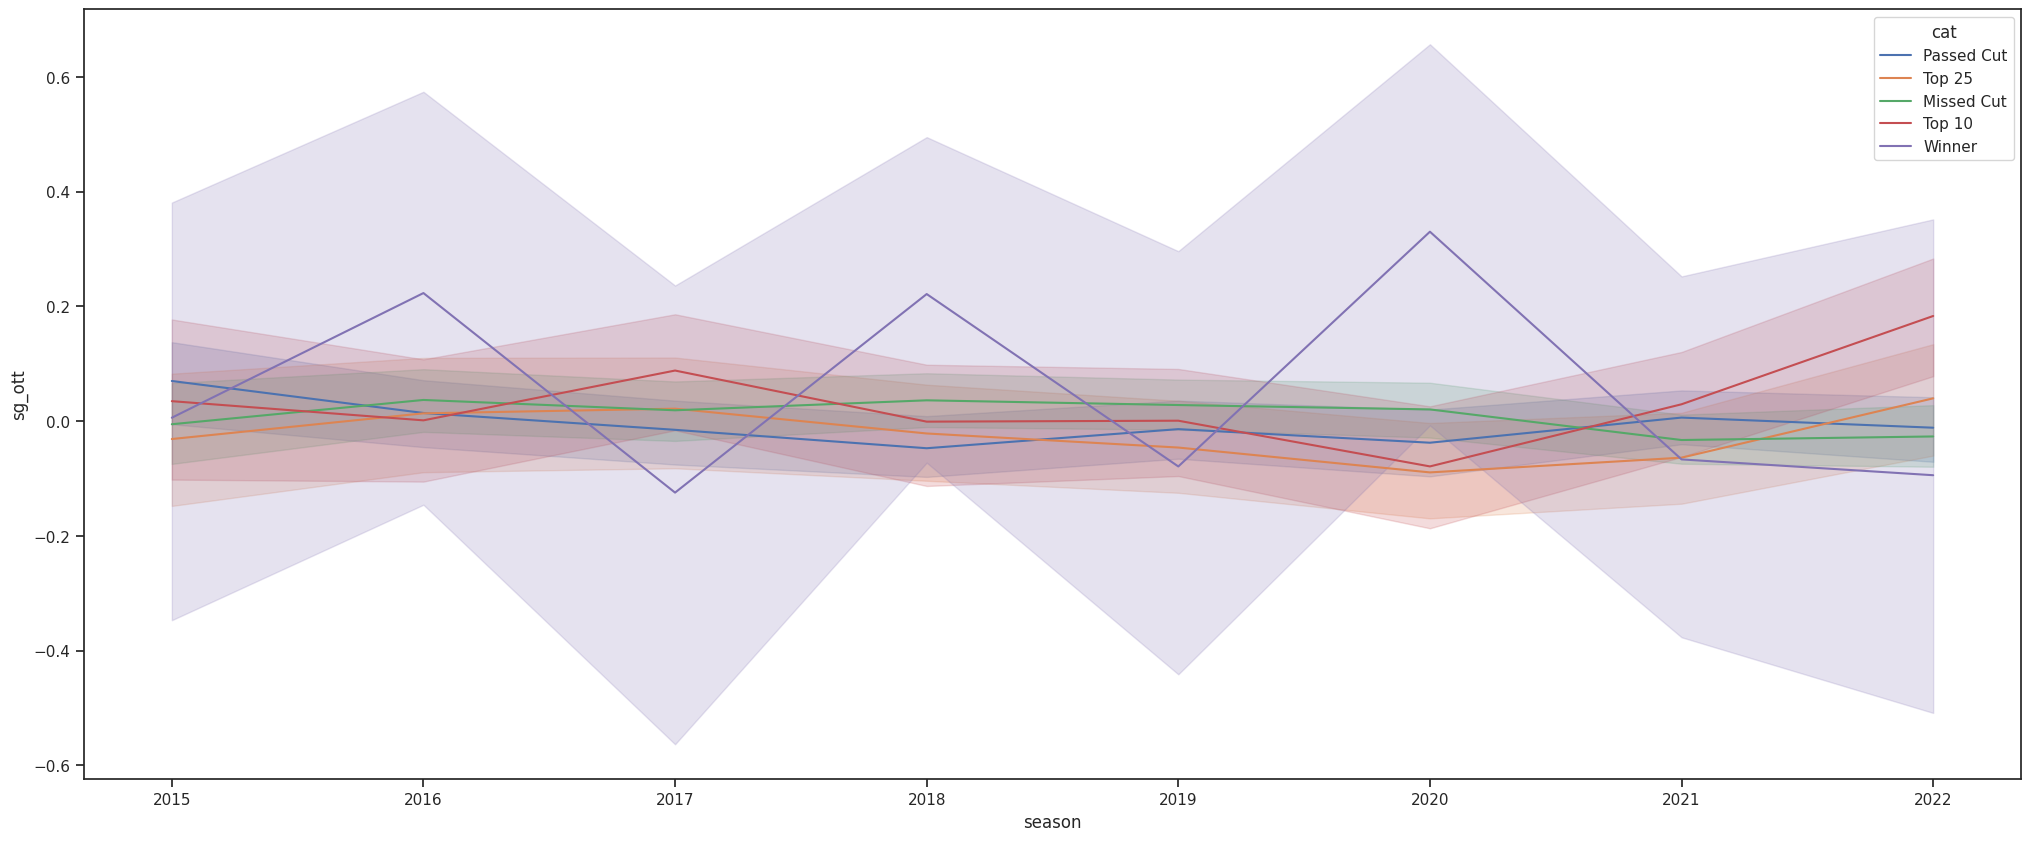

In [123]:
sns.set_style('ticks')
plt.figure(figsize=(25,10))
sns.lineplot(data=scaled_comp, x='season', y='sg_ott', hue='cat')

In [124]:
golf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28752 entries, 0 to 29179
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  28752 non-null  object 
 1   tournament id        28752 non-null  int64  
 2   player id            28752 non-null  int64  
 3   hole_par             28752 non-null  int64  
 4   strokes              28752 non-null  int64  
 5   player               28752 non-null  object 
 6   tournament name      28752 non-null  object 
 7   course               28752 non-null  object 
 8   date                 28752 non-null  object 
 9   season               28752 non-null  int64  
 10  no_cut               28752 non-null  int64  
 11  Finish               28752 non-null  int64  
 12  sg_putt              28752 non-null  float64
 13  sg_arg               28752 non-null  float64
 14  sg_app               28752 non-null  float64
 15  sg_ott               28752 non-null 

In [125]:
golf.head()

Player_initial_last  tournament id  player id  hole_par  strokes  \
0            A. Ancer      401353224       9261       288      289   
1           A. Hadwin      401353224       5548       288      286   
2           A. Lahiri      401353224       4989       144      147   
3             A. Long      401353224       6015       144      151   
4            A. Noren      401353224       3832       144      148   

            player                              tournament name  \
0    Abraham Ancer  The Memorial Tournament pres. by Nationwide   
1      Adam Hadwin  The Memorial Tournament pres. by Nationwide   
2   Anirban Lahiri  The Memorial Tournament pres. by Nationwide   
3        Adam Long  The Memorial Tournament pres. by Nationwide   
4  Alexander Noren  The Memorial Tournament pres. by Nationwide   

                                     course        date  season  no_cut  \
0  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
1  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
2  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
3  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
4  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   

   Finish  sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  sg_total         cat  
0      32     0.20   -0.13   -0.08    0.86    0.65      0.85  Passed Cut  
1      18     0.36    0.75    0.31    0.18    1.24      1.60      Top 25  
2       0    -0.56    0.74   -1.09    0.37    0.02     -0.54  Missed Cut  
3       0    -1.46   -1.86   -0.02    0.80   -1.08     -2.54  Missed Cut  
4       0     0.53   -0.36   -1.39    0.19   -1.56     -1.04  Missed Cut

In [126]:
golf['date_month'] = [x[:-3] for x in golf['date']]

In [127]:
golf.head()

Player_initial_last  tournament id  player id  hole_par  strokes  \
0            A. Ancer      401353224       9261       288      289   
1           A. Hadwin      401353224       5548       288      286   
2           A. Lahiri      401353224       4989       144      147   
3             A. Long      401353224       6015       144      151   
4            A. Noren      401353224       3832       144      148   

            player                              tournament name  \
0    Abraham Ancer  The Memorial Tournament pres. by Nationwide   
1      Adam Hadwin  The Memorial Tournament pres. by Nationwide   
2   Anirban Lahiri  The Memorial Tournament pres. by Nationwide   
3        Adam Long  The Memorial Tournament pres. by Nationwide   
4  Alexander Noren  The Memorial Tournament pres. by Nationwide   

                                     course        date  season  no_cut  \
0  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
1  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
2  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
3  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   
4  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022       0   

   Finish  sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  sg_total         cat  \
0      32     0.20   -0.13   -0.08    0.86    0.65      0.85  Passed Cut   
1      18     0.36    0.75    0.31    0.18    1.24      1.60      Top 25   
2       0    -0.56    0.74   -1.09    0.37    0.02     -0.54  Missed Cut   
3       0    -1.46   -1.86   -0.02    0.80   -1.08     -2.54  Missed Cut   
4       0     0.53   -0.36   -1.39    0.19   -1.56     -1.04  Missed Cut   

  date_month  
0    2022-06  
1    2022-06  
2    2022-06  
3    2022-06  
4    2022-06

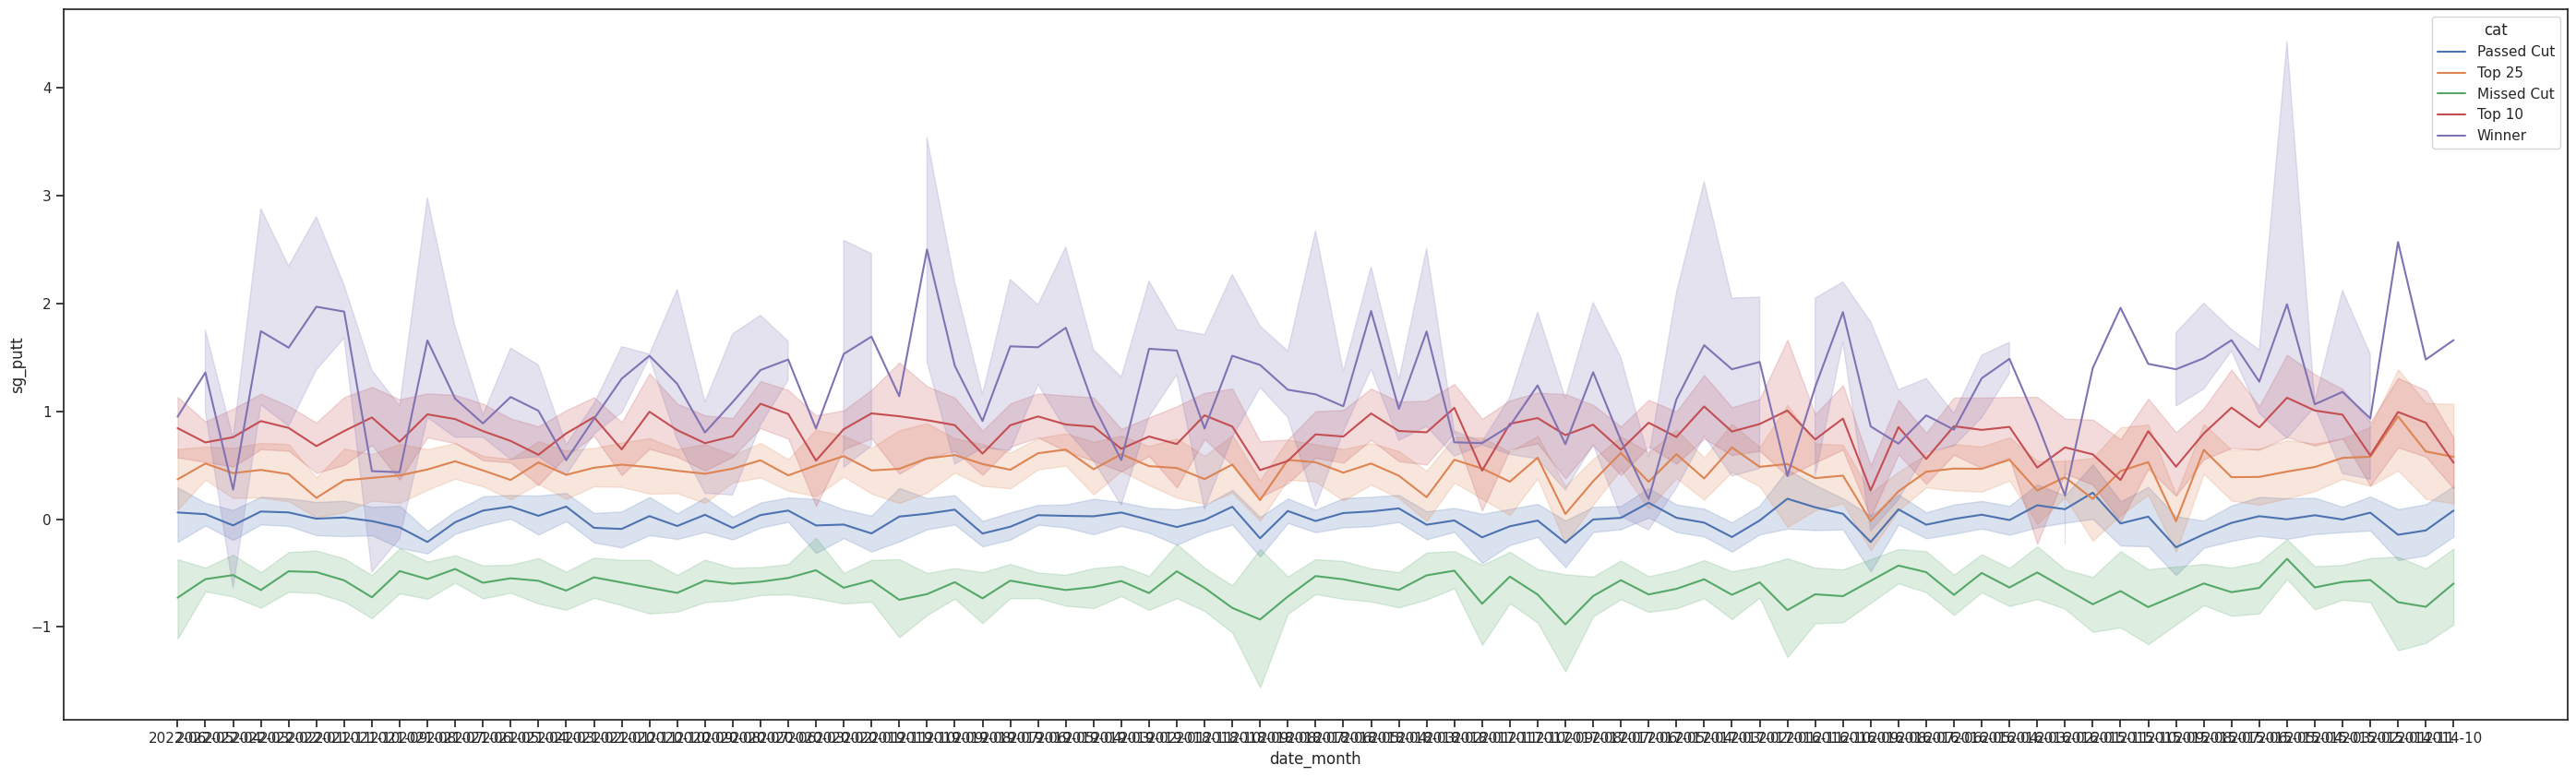

In [169]:
sns.set_style('ticks')
plt.figure(figsize=(35,10))
sns.lineplot(data=golf, x='date_month', y='sg_putt', hue='cat')

plt.savefig('miculo.png')

In [ ]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = golf[['sg_putt', 'sg_arg', 'sg_ott', 'sg_t2g', 'sg_app', 'sg_total']]

std_scaler = StandardScaler()

scaled_golf = pd.DataFrame(std_scaler.fit_transform(golf[['sg_putt', 'sg_arg', 'sg_ott', 'sg_t2g', 'sg_app', 'sg_total']])).reset_index(drop=True)

scaled_golf.columns = cols_to_scale.columns

In [130]:
scaled_comp_2 = pd.concat([golf[['date', 'season', 'cat', 'date_month']], scaled_golf], axis=1)

<AxesSubplot: xlabel='date_month', ylabel='sg_putt'>

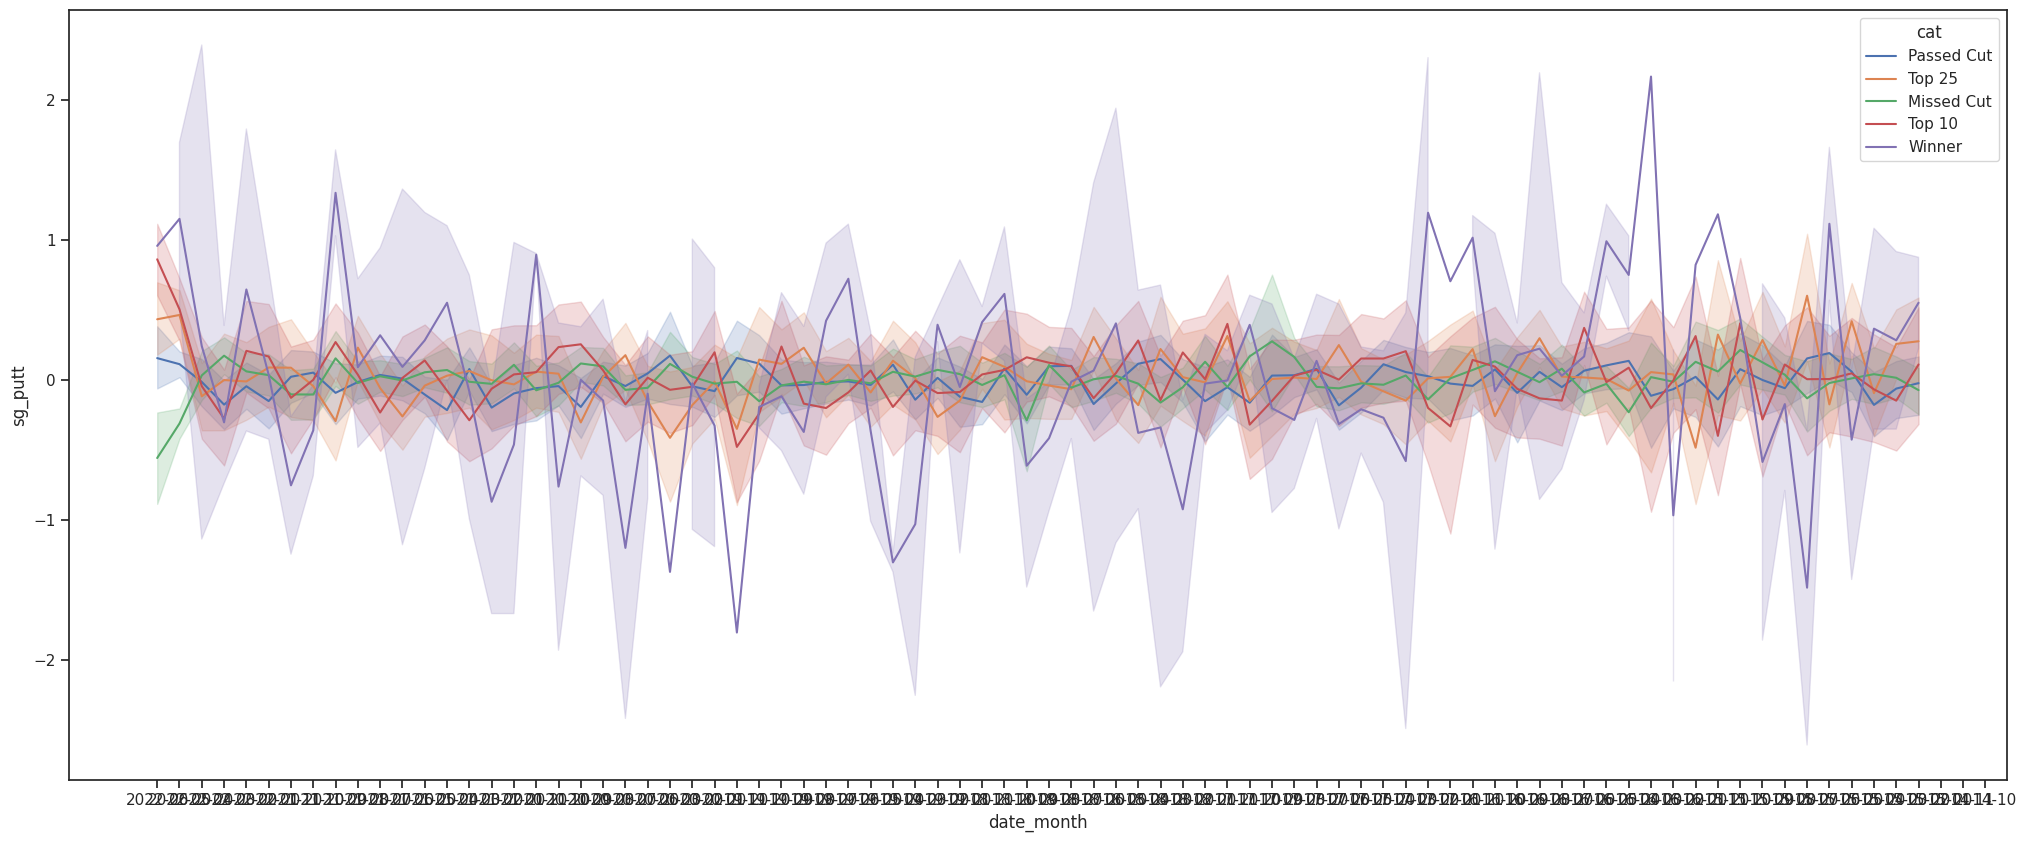

In [132]:
sns.set_style('ticks')
plt.figure(figsize=(25,10))
sns.lineplot(data=scaled_comp_2, x='date_month', y='sg_putt', hue='cat')

In [135]:
# Taggear si grande o no

#     Masters Tournament
#     PGA Championship
#     The Open
#     U.S. Open

golf['Type'] = ['Major' if x in ['Masters Tournament', 'PGA Championship', 'The Open', 'U.S. Open'] else 'Regular Tournament' for x in golf['tournament name']]

In [136]:
golf.head()

Player_initial_last  tournament id  player id  hole_par  strokes  \
0            A. Ancer      401353224       9261       288      289   
1           A. Hadwin      401353224       5548       288      286   
2           A. Lahiri      401353224       4989       144      147   
3             A. Long      401353224       6015       144      151   
4            A. Noren      401353224       3832       144      148   

            player                              tournament name  \
0    Abraham Ancer  The Memorial Tournament pres. by Nationwide   
1      Adam Hadwin  The Memorial Tournament pres. by Nationwide   
2   Anirban Lahiri  The Memorial Tournament pres. by Nationwide   
3        Adam Long  The Memorial Tournament pres. by Nationwide   
4  Alexander Noren  The Memorial Tournament pres. by Nationwide   

                                     course        date  season  ...  Finish  \
0  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022  ...      32   
1  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022  ...      18   
2  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022  ...       0   
3  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022  ...       0   
4  Muirfield Village Golf Club - Dublin, OH  2022-06-05    2022  ...       0   

   sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  sg_total         cat date_month  \
0     0.20   -0.13   -0.08    0.86    0.65      0.85  Passed Cut    2022-06   
1     0.36    0.75    0.31    0.18    1.24      1.60      Top 25    2022-06   
2    -0.56    0.74   -1.09    0.37    0.02     -0.54  Missed Cut    2022-06   
3    -1.46   -1.86   -0.02    0.80   -1.08     -2.54  Missed Cut    2022-06   
4     0.53   -0.36   -1.39    0.19   -1.56     -1.04  Missed Cut    2022-06   

                 Type  
0  Regular Tournament  
1  Regular Tournament  
2  Regular Tournament  
3  Regular Tournament  
4  Regular Tournament  

[5 rows x 21 columns]

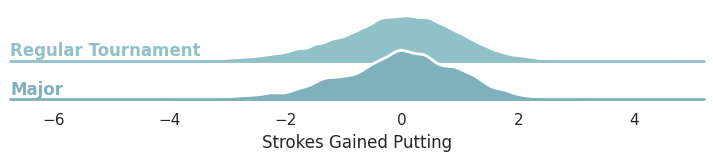

In [138]:
# Initialize the FacetGrid object
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(golf.sort_values('sg_putt'), row="Type", hue="Type", aspect=8, height=1., palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "sg_putt",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'sg_putt', clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'sg_putt')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel="Strokes Gained Putting")
g.despine(bottom=True, left=True)

In [212]:
golf_champs_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 55 to 29121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  493 non-null    object 
 1   tournament id        493 non-null    int64  
 2   player id            493 non-null    int64  
 3   hole_par             493 non-null    int64  
 4   strokes              493 non-null    int64  
 5   player               493 non-null    object 
 6   tournament name      493 non-null    object 
 7   course               493 non-null    object 
 8   date                 493 non-null    object 
 9   season               493 non-null    int64  
 10  no_cut               493 non-null    int64  
 11  Finish               493 non-null    int64  
 12  sg_putt              493 non-null    float64
 13  sg_arg               493 non-null    float64
 14  sg_app               493 non-null    float64
 15  sg_ott               493 non-null    

In [234]:
golf_champs_red.loc[golf_champs_red['player'] == 'Rory Mcilroy'].describe()

tournament id  player id  hole_par  strokes  season  no_cut  Finish  \
count            0.0        0.0       0.0      0.0     0.0     0.0     0.0   
mean             NaN        NaN       NaN      NaN     NaN     NaN     NaN   
std              NaN        NaN       NaN      NaN     NaN     NaN     NaN   
min              NaN        NaN       NaN      NaN     NaN     NaN     NaN   
25%              NaN        NaN       NaN      NaN     NaN     NaN     NaN   
50%              NaN        NaN       NaN      NaN     NaN     NaN     NaN   
75%              NaN        NaN       NaN      NaN     NaN     NaN     NaN   
max              NaN        NaN       NaN      NaN     NaN     NaN     NaN   

       sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  sg_total  
count      0.0     0.0     0.0     0.0     0.0       0.0  
mean       NaN     NaN     NaN     NaN     NaN       NaN  
std        NaN     NaN     NaN     NaN     NaN       NaN  
min        NaN     NaN     NaN     NaN     NaN       NaN  
25%        NaN     NaN     NaN     NaN     NaN       NaN  
50%        NaN     NaN     NaN     NaN     NaN       NaN  
75%        NaN     NaN     NaN     NaN     NaN       NaN  
max        NaN     NaN     NaN     NaN     NaN       NaN

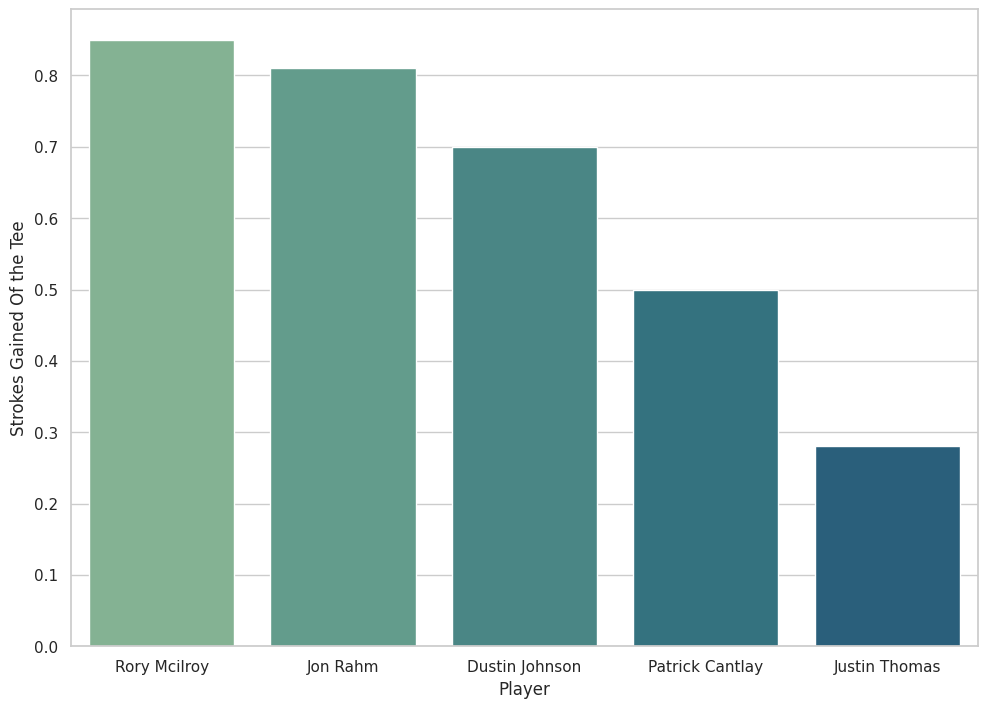

In [246]:
dicti=({'Rory Mcilroy': 0.85,'Jon Rahm': 0.81,'Dustin Johnson': 0.7,
        'Patrick Cantlay': 0.5,'Justin Thomas': 0.28})
pd_df = pd.DataFrame(list(dicti.items()))
pd_df.columns = ['Dim', 'Count']

# Bar chart
sns.set_theme(style='whitegrid', palette='crest')
ax = sns.barplot(data=pd_df, x='Dim', y='Count', order=pd_df['Dim'])

plt.xlabel('Player')
plt.ylabel('Strokes Gained Of the Tee')

# fig = ax.get_figure()
# fig.savefig('bars3.png')

In [210]:
golf.loc[golf['cat'] == 'Missed Cut'].describe()

tournament id     player id      hole_par       strokes        season  \
count   1.224200e+04  1.224200e+04  12242.000000  12242.000000  12242.000000   
mean    2.564309e+08  9.788410e+04    146.913168    149.931792   2018.817840   
std     1.926660e+08  6.408835e+05     19.267453     19.171113      2.157884   
min     2.232000e+03  5.000000e+00    140.000000    134.000000   2015.000000   
25%     2.712000e+03  1.179750e+03    142.000000    143.000000   2017.000000   
50%     4.010565e+08  3.950000e+03    142.000000    145.000000   2019.000000   
75%     4.012238e+08  6.701000e+03    144.000000    149.000000   2021.000000   
max     4.013533e+08  4.845309e+06    288.000000    306.000000   2022.000000   

             no_cut        Finish       sg_putt        sg_arg        sg_app  \
count  12242.000000  12242.000000  12242.000000  12242.000000  12242.000000   
mean       0.003839      0.648015     -0.599619     -0.237492     -0.585273   
std        0.061845      7.292506      1.215171      0.848502      1.215971   
min        0.000000      0.000000     -5.990000     -6.430000     -9.250000   
25%        0.000000      0.000000     -1.380000     -0.740000     -1.320000   
50%        0.000000      0.000000     -0.560000     -0.220000     -0.540000   
75%        0.000000      0.000000      0.200000      0.290000      0.210000   
max        1.000000     91.000000      4.360000      3.170000      4.600000   

             sg_ott        sg_t2g      sg_total  
count  12242.000000  12242.000000  12242.000000  
mean      -0.272761     -1.095615     -1.694842  
std        0.940542      1.650344      1.684481  
min       -7.740000    -13.950000    -12.460000  
25%       -0.780000     -2.020000     -2.550000  
50%       -0.170000     -0.950000     -1.390000  
75%        0.360000     -0.010000     -0.540000  
max        2.550000      6.300000      5.960000